Align matplotlib rcParams with the style of AIAA papers.

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Add Times New Roman font
fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')

# Set figure size to match LaTeX document
TEXTWIDTH_INCHES = 6.5243752778  # paper textwidth in inches
FIG_WIDTH_INCHES = TEXTWIDTH_INCHES*.5
FIG_HEIGHT_INCHES = FIG_WIDTH_INCHES*(4.8/6.4)  # default figure height in inches
DEFAULT_LINE_WIDTH = 1
DEFAULT_MARKER_SIZE = 2
DEFAULT_TICK_LABEL_SIZE = 8

# Font settings to match newtxtext and newtxmath
plt.rcParams.update({
    'font.family': ['Times New Roman', 'DejaVu Serif', 'serif'],
    'font.size': 10,  # Base font size from class file
    'mathtext.fontset': 'cm',
    
    # Figure settings
    'figure.figsize': (FIG_WIDTH_INCHES, FIG_HEIGHT_INCHES),  # Typical single-column width
    'figure.dpi': 300,
    'figure.constrained_layout.use': True,
    
    # Axes settings
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'axes.linewidth': 0.5,
    'axes.grid': False,
    
    # Tick settings
    'xtick.labelsize': DEFAULT_TICK_LABEL_SIZE,
    'ytick.labelsize': DEFAULT_TICK_LABEL_SIZE,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.minor.width': 0.5,
    'ytick.minor.width': 0.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    
    # Legend settings
    'legend.fontsize': 8,
    'legend.frameon': False,
    'legend.handlelength': 2,
    
    # Line settings
    'lines.linewidth': DEFAULT_LINE_WIDTH,
    'lines.markersize': DEFAULT_MARKER_SIZE,
    'grid.linewidth': .5,
    
    # Save settings
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
    'savefig.dpi': 300,
})

Constants.

In [39]:
import tol_colors as tc  # package for colorblind-friendly colors
import os  # package for file and directory manipulation
from matplotlib.lines import Line2D  # class defining the characters for the marker styles

# Set up matplotlib for interactive plotting
%matplotlib widget

# Set default color cycle to TOL bright and default dpi of figures
plt.rc('axes', prop_cycle=plt.cycler('color', list(tc.tol_cset('bright'))))

# DEFAULT_FONT_SIZE = 8  # default font size of figures
# DEFAULT_MARKER_SIZE = 3  # default marker size of lines
# plt.rcParams.update({
#     'figure.dpi': 120,  # default figure dpi
#     'text.usetex': True,  # use LaTeX to render text
#     'font.family': 'serif',  # use serif rather than sans-serif
#     'font.serif': "Times New Roman",  # use Times New Roman
#     'font.size': DEFAULT_FONT_SIZE,  # default font size of figures
#     'mathtext.fontset': 'stix',  # use Times New Roman for math
#     'lines.markersize': DEFAULT_MARKER_SIZE})  # set default marker size of lines

# Set the path to the directory containing the analysis files
ANALYSIS_DIRECTORY_PATH = os.path.join(
    os.getcwd(), "analyses",                                   
    "Preliminary_Aeroelastic_Optimization_of_the_Simple_Trasonic_Wing_with_Nonlinear_Structural_Stability_Constraints")

# Set the path to the directory where to save figures
FIGURES_DIRECTORY_PATH = os.path.join(
    os.getcwd(), "analyses", "SciTech2025")

# Set the path to the directory containing the airfoil data
AIRFOIL_PATH = os.path.join(os.getcwd(), "resources", "STW", "rae2822.dat")

# Define constant variables related to plotting
Y_COMPONENT_INDEX = 1  # index of y-component in load and displacement array
Z_COMPONENT_INDEX = 2  # index of z-component in load and displacement array
MARKERS = list(Line2D.markers.keys())[2:]  # list of marker characters
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']  # list with default color cycle
UNSTABLE_COLOR = COLORS[1]  # color for unstable segments
GLASS_CEILING_COLOR = COLORS[2]  # green is used for glass ceiling
del COLORS[1:3]  # delete red from list of colors

# Define constant variables related to Nastran analysis
FIRST_SUBCASE_ID = 1
SECOND_SUBCASE_ID = 2
SPC_SET_ID = 1          # id of the SPC cards created by create_base_bdf
FORCE_SET_ID = 1        # id of the FORCE cards created by aeroelastic analysis
PRESSURE_SET_ID = 2     # id of the PLOAD2 cards used for benchmark structural analysis
GRAVITY_SET_ID = 3      # id of the GRAV card employed for benchmark structural analysis
LOAD_SET_ID = 4         # id of the LOAD card employed for SOL 105 and SOL 106
METHOD_SET_ID = 5       # id of method set used for the calculation of eigenvalues
TRIM_SET_ID = 6         # id of the TRIM card used for SOL 144
NO_EIGENVALUES = 20     # number of eigenvalues to be calculated
UPPER_EIGENVALUE = 1e5  # upper bound for the eigenvalues of the tangent stiffness matrix - set to 10^5 N/m to avoid convergence issues of Lanczos solver

# Define constant variables related to tolerances
OPTIMIZER_TOLERANCE = 1e-3  # convergence tolerance for the optimizer
NODE_TOLERANCE = 1e-4  # tolerance for node coordinates comparison [m]

# Define constant masses
PAYLOAD_MASS = 14.5e3  # kg
AIRFRAME_MASS = 25e3  # kg
RESERVE_FUEL_MASS = 2e3  # kg

Wing planform.

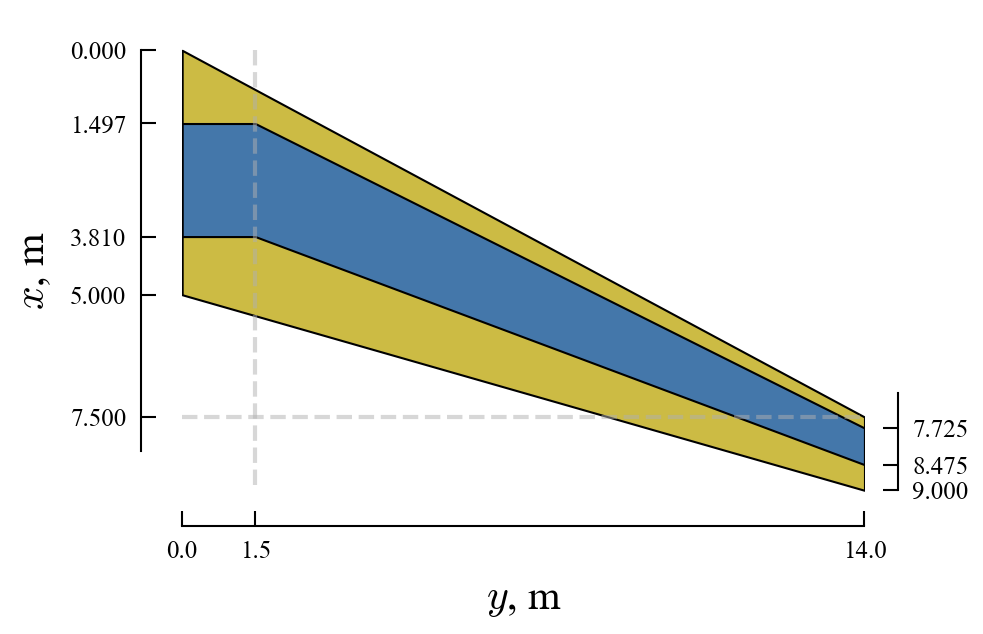

In [3]:
from resources.STW import wingGeometry

# Reduce the font size of the ticks
ticks_fontsize = 6
plt.rcParams.update({
    'xtick.labelsize': ticks_fontsize,
    'ytick.labelsize': ticks_fontsize})

# Calculate the desired figure dimensions
x_range = 14.0 - 0.0  # Your x-axis range
y_range = 9.0 - 0.0   # Your y-axis range
desired_ratio = x_range / y_range

# Set a base figure height (in inches) and calculate width to maintain ratio
fig_height = FIG_WIDTH_INCHES/desired_ratio

# Create the plot with calculated dimensions
fig = plt.figure(figsize=(FIG_WIDTH_INCHES, fig_height))
ax1 = fig.add_subplot(111)
ax1.spines[['right', 'top']].set_visible(False)
ax1.spines.left.set_position(('outward', 10))

# Plot wing outline
plt.fill_between(
    wingGeometry.LECoords[:, 1],
    wingGeometry.LECoords[:, 0],
    wingGeometry.TECoords[:, 0],
    color=COLORS[1], edgecolor='black', linewidth=0.5)

# Plot wingbox
plt.fill_between(
    wingGeometry.LESparCoords[:, 1],
    wingGeometry.LESparCoords[:, 0],
    wingGeometry.TESparCoords[:, 0],
    color=COLORS[0], edgecolor='black', linewidth=0.5)

# Add axis labels
ax1.set_xlabel('$y$, m')
ax1.set_ylabel('$x$, m')

# Customize ticks
ax1.set_xticks([0., 1.5, 14.])
ax1.set_yticks([0., 1.497, 3.810, 5., 7.5])

# Set left spine bounds
ax1.spines.left.set_bounds((0., 8.2))

# Set axis limits
ax1.set_xlim(0., 14.)
ax1.set_ylim(0., 9.)

# Add second y-axis
ax2 = ax1.twinx()
ax2.spines[['left', 'top', 'bottom']].set_visible(False)
ax2.spines.right.set_position(('outward', 8))
ax2.set_yticks([7.725, 8.475, 9.])
ax2.spines.right.set_bounds((7., 9.))

# Invert y-axis to match the original plot
ax1.invert_yaxis()
ax2.invert_yaxis()

# Add grid lines for tip leading edge and side of body
ax1.axhline(
    7.5, linestyle='--', color=plt.rcParams['grid.color'],
    linewidth=1.,alpha=0.5)
ax1.axvline(
    1.5, ymin=.08, ymax=.94, linestyle='--', color=plt.rcParams['grid.color'],
    linewidth=1., alpha=0.5)

# Set aspect ratio
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# Show the plot
plt.show()

# Save the figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "WingPlanform.pdf"))

# Restore default font size of the ticks
plt.rcParams.update({
    'xtick.labelsize': DEFAULT_TICK_LABEL_SIZE,
    'ytick.labelsize': DEFAULT_TICK_LABEL_SIZE})

Plot convergence of linear buckling load with the number of degrees of freedom.

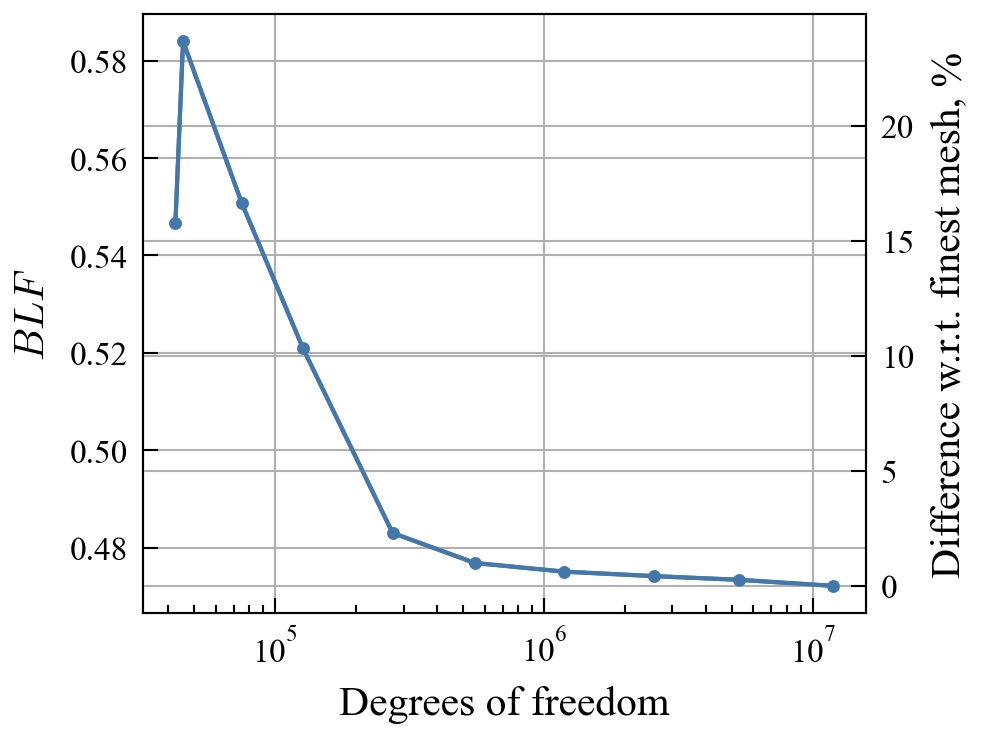


Converged structural mesh:
- 46432 elements
- 272892 degrees of freedom
- buckling load factor 0.48


In [4]:
import numpy as np
from pyNastran.op2.op2 import read_op2

# Define the array with the number of elements for each mesh and initiliaze
# arrays to store the number of degrees of freedom and the buckling load
# factors
no_elements_array = np.array([
    7480, 7960, 12928, 21592, 46432, 93600, 198928, 429208, 891808, 1988120])
dofs = np.empty_like(no_elements_array, dtype=int)
buckling_load_factors = np.empty_like(no_elements_array, dtype=float)

# Iterate through the different edge lengths
for i, no_elements in enumerate(no_elements_array):
    # Read OP2 file
    op2_filepath = os.path.join(
        ANALYSIS_DIRECTORY_PATH, f"sol_105_{no_elements}_elements.op2")
    sol_105_op2 = read_op2(
        op2_filename=op2_filepath, load_geometry=True, debug=None)
    
    # Store number of elements and number of degrees of freedom of current model
    constrained_nodes_ids = next(iter(sol_105_op2.spcs.values()))[0].node_ids
    dofs[i] = (len(sol_105_op2.nodes) - len(constrained_nodes_ids))*6
    
    # Store buckling load factor of current model
    buckling_load_factors[i] = sol_105_op2.eigenvectors[SECOND_SUBCASE_ID].eigr


# Plot buckling loads vs degrees of freedom with a log scale along the x-axis
fig, ax1 = plt.subplots()  # create a figure and set of axes
buckling_load_line = ax1.semilogx(dofs, buckling_load_factors, 'o-')

# Create a twin set of axes to plot percentage difference vs degrees of freedom
ax2 = ax1.twinx()
percentage_diff = (buckling_load_factors/buckling_load_factors[-1]-1)*100
percentage_diff_line = ax2.plot(dofs, percentage_diff, 'o-')

# Set plot appearance
ax1.set_xlabel('Degrees of freedom')
ax1.set_ylabel('$BLF$')
ax2.set_ylabel('Difference w.r.t. finest mesh, %')
ax1.grid(True)
ax2.grid(True)
plt.show()

# Save figure
fig.savefig(
    os.path.join(FIGURES_DIRECTORY_PATH, "StructMeshConvergenceStudy.pdf"))

# Find the index of the first percentage difference below 2.5% and print the
# results
converged_mesh_index = np.where(np.abs(percentage_diff) < 2.5)[0][0]
no_elements_converged_mesh = no_elements_array[converged_mesh_index]
blf_converged_mesh = buckling_load_factors[converged_mesh_index]
print(f"""
Converged structural mesh:
- {no_elements_converged_mesh} elements
- {dofs[converged_mesh_index]} degrees of freedom
- buckling load factor {blf_converged_mesh:.2f}""")

Plot critical buckling mode obtained with converged mesh.

/mnt/c/Users/qa21944/Github/phd-jupyter-notebooks/notebooks/resources/plot_utils.py:622: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
/home/fmamitrotta/anaconda3/envs/aeroelastic-opt-benchmark/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


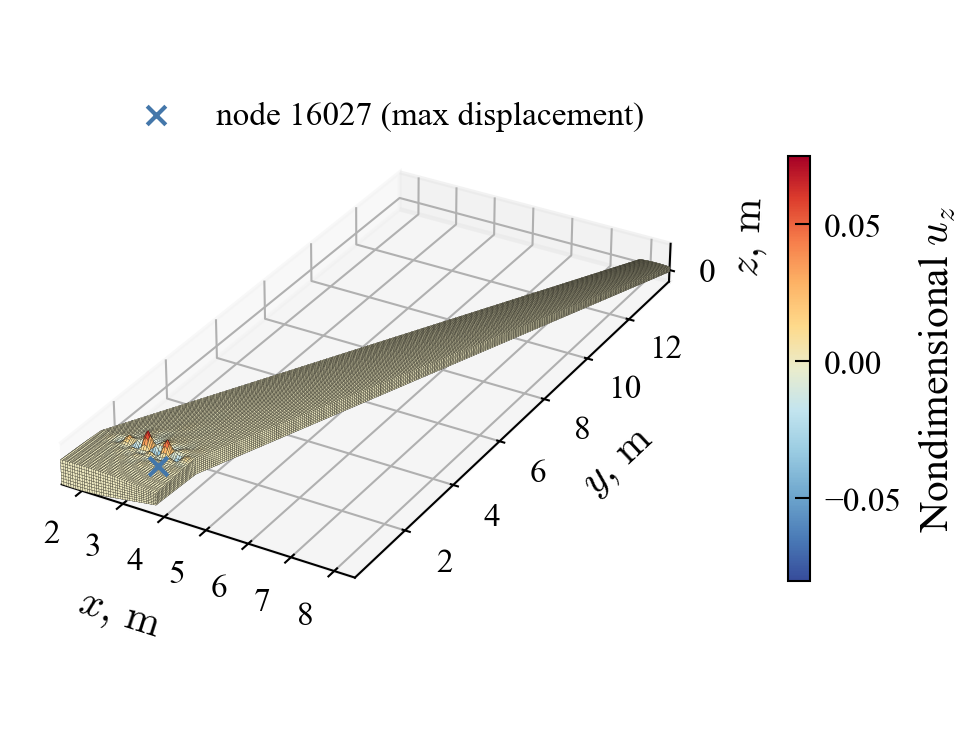

/tmp/ipykernel_1576701/2610599114.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(


In [5]:
from resources import plot_utils

# Define function to adjust axes ticks and labels' position
def adjust_3d_plot(axes):
    axes.tick_params(axis="x", which="major", pad=-1)  # adjust position of ticks' label of x-axis
    axes.tick_params(axis="z", which="major", pad=-2)  # adjust position of ticks' label of z-axis
    axes.xaxis.labelpad = -1  # adjust position of x-axis's label
    axes.yaxis.labelpad = 8  # adjust position of y-axis's label
    axes.zaxis.labelpad = -8  # adjust position of z-axis's label
        
# Read OP2 file of the converged mesh
key = "original mesh"
sol_105_op2_dict = {}
input_name = f"sol_105_{no_elements_converged_mesh}_elements"
sol_105_op2_dict[key] = read_op2(
    op2_filename=os.path.join(ANALYSIS_DIRECTORY_PATH, f"{input_name}.op2"),
    load_geometry=True, debug=None)
    
# Plot critical buckling mode
amplification_factor = 5.
fig, ax, cbar = plot_utils.plot_eigenvector(
        op2=sol_105_op2_dict[key], subcase_id=SECOND_SUBCASE_ID,
        displacement_component='tz', colormap='sunset',
        displacement_amplification_factor=amplification_factor,
        shrink_colorbar=.6, colorbar_pad=.09)

# Plot node where max displacement occurs and add node id to dictionary
max_disp_node_id_dict = {}
max_disp_node_id_dict[key] = plot_utils.plot_max_displacement_node(
    axes=ax, op2=sol_105_op2_dict[key],
    displacement_amplification_factor=amplification_factor)

# Add legend, adjust plot appearance and show plot
ax.legend(bbox_to_anchor=(.93, .92))
ax.set_zticks([0.])
adjust_3d_plot(ax)
plt.show()

# Save figure
fig.savefig(
    os.path.join(FIGURES_DIRECTORY_PATH, "BenchmarkCriticalBucklingMode.pdf"))

Plot critical bucklnig mode obtained with refined mesh.

/mnt/c/Users/qa21944/Github/phd-jupyter-notebooks/notebooks/resources/plot_utils.py:622: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
/home/fmamitrotta/anaconda3/envs/aeroelastic-opt-benchmark/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


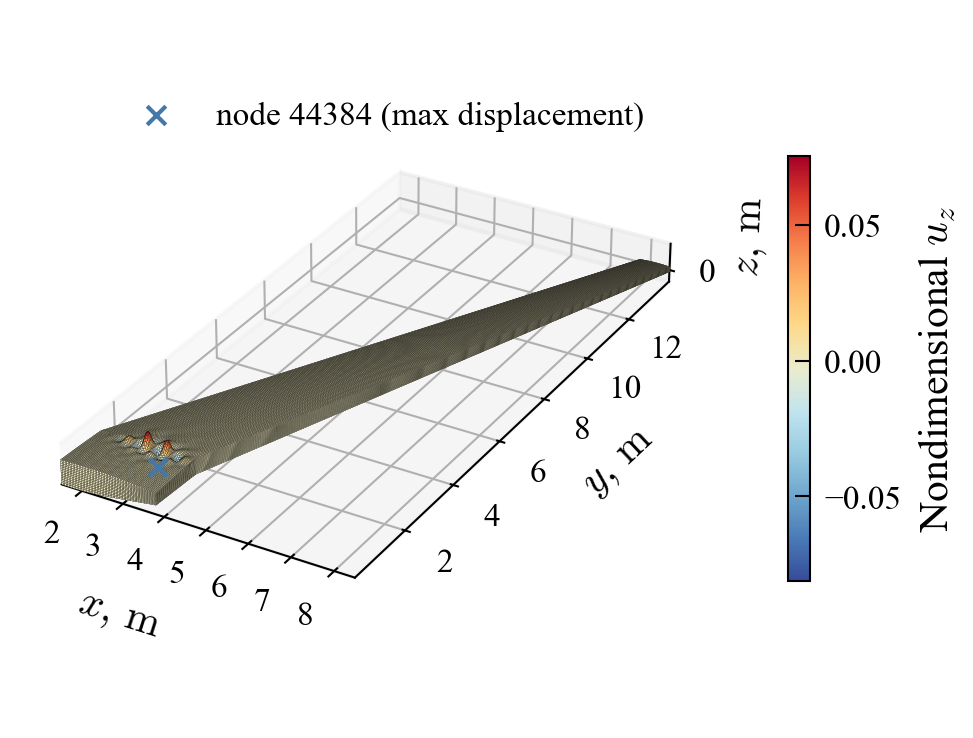

/tmp/ipykernel_1576701/4022868329.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(os.path.join(


/home/fmamitrotta/anaconda3/envs/aeroelastic-opt-benchmark/lib/python3.10/site-packages/ipympl/backend_nbagg.py:279: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.manager.handle_json(content)


In [6]:
# Read OP2 file obtained with refined mesh
key = "refined mesh"
no_elements_refined_mesh = 121256
op2_filepath = os.path.join(
        ANALYSIS_DIRECTORY_PATH,
        f"sol_105_{no_elements_refined_mesh}_elements.op2")
sol_105_op2_dict[key] = read_op2(
        op2_filename=op2_filepath, load_geometry=True, debug=None)

# Plot critical buckling mode
fig, ax, cbar = plot_utils.plot_eigenvector(
        op2=sol_105_op2_dict[key], subcase_id=SECOND_SUBCASE_ID,
        displacement_component='tz', colormap='sunset',
        displacement_amplification_factor=amplification_factor,
        shrink_colorbar=.6, colorbar_pad=.09)

# Plot node where max displacement occurs and add node id to dictionary
max_disp_node_id_dict[key] = plot_utils.plot_max_displacement_node(
        axes=ax, op2=sol_105_op2_dict[key],
        displacement_amplification_factor=amplification_factor)

# Add legend, adjust plot appearance and show plot
ax.legend(bbox_to_anchor=(.93, .92))
ax.set_zticks([0.])
adjust_3d_plot(ax)
plt.show()

# Save figure
fig.savefig(os.path.join(
        FIGURES_DIRECTORY_PATH, "RefinedMeshCriticalBucklingMode.pdf"))

Plot comparison of the load-displacement diagram obtained for the benchmark structural analysis.

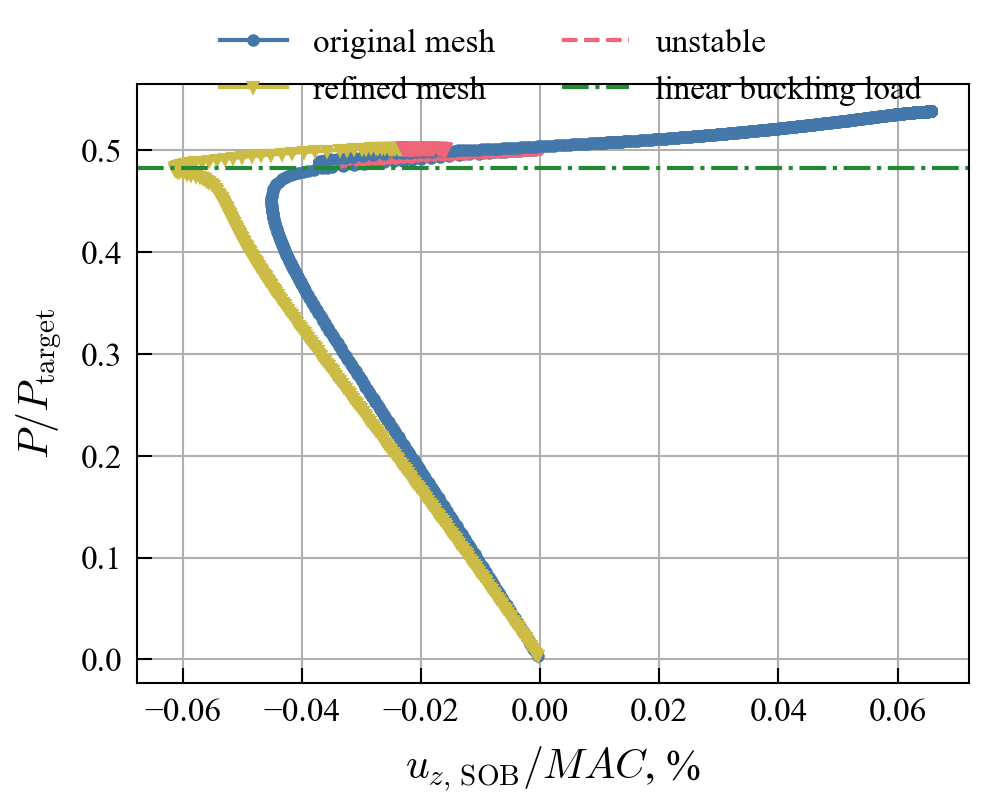

In [ ]:
# from itertools import compress
from resources import pynastran_utils

# Read SOL 106 OP2 files and corresponding eigenvalues
sol_106_op2_dict = {}
eigenvalues_dict = {}
for (no_elements, key) in zip(
    [no_elements_converged_mesh, no_elements_refined_mesh],
    sol_105_op2_dict.keys()):
    # Read SOL 106 OP2 file
    sol_106_op2_dict[key] = read_op2(
        op2_filename=os.path.join(
            ANALYSIS_DIRECTORY_PATH, f"sol_106_{no_elements}_elements.op2"),
        load_geometry=True, debug=None)
    # Read eigenvalues from f06 file
    eigenvalues_dict[key] =\
        pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(
        f06_filepath=os.path.join(
            ANALYSIS_DIRECTORY_PATH, f"sol_106_{no_elements}_elements.f06"))

# Create figure for load-displacement diagram
fig, ax = plt.subplots()  # create a figure with two subplots
load_factor_dict = {}  # dictionary to store load factors
stable_lines = []  # list to store proxy artists for the legend

# Loop over the two meshes and plot the load-displacement diagram
for i, key in enumerate(sol_106_op2_dict):
    # Read the displacement history
    load_factors, _, displacements =\
        pynastran_utils.read_load_displacement_history_from_op2(
            op2=sol_106_op2_dict[key], node_ids=[max_disp_node_id_dict[key]])
        
    # Store the load factor of the first subcase
    load_factor_dict[key] = load_factors[FIRST_SUBCASE_ID]
    
    # Calculate nondimensional SOB displacements
    nondimensional_sob_displacements = displacements[
        max_disp_node_id_dict[key]][FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/\
            wingGeometry.meanAerodynamicChord
    
    # Plot the load-displacement diagram
    plot_utils.plot_2d_load_displacements_stability(
        axes=ax,
        displacements=nondimensional_sob_displacements*100,
        loads=load_factor_dict[key],
        eigenvalues=eigenvalues_dict[key],
        marker=MARKERS[i], color=COLORS[i])
    
    # Add proxy artist for the legend
    stable_lines.append(Line2D(
        [0], [0], linestyle='-', marker=MARKERS[i], color=COLORS[i],
        label=key))
    
# Plot glass-ceiling line
ax.axhline(y=blf_converged_mesh, color=GLASS_CEILING_COLOR, linestyle='-.')

# Set grid and axes labels
ax.grid(visible=True)
ax.set_xlabel(
    "$u_{z,\,\mathrm{SOB}}/MAC$, %")
ax.set_ylabel("$P/P_\mathrm{target}$")

# Add proxy artist for unstable lines and create legend
unstable_line = Line2D(
    [0], [0], linestyle='--', color=UNSTABLE_COLOR, label="unstable")
linear_buckling_line = Line2D(
    [0], [0], linestyle='-.', color=GLASS_CEILING_COLOR,
    label="linear buckling load")
fig.legend(
    handles=stable_lines + [unstable_line, linear_buckling_line],
    ncol=2, bbox_to_anchor=(.81, 1.15))

# Show and save plot
plt.show()
fig.savefig(os.path.join(
        FIGURES_DIRECTORY_PATH,
        "BenchmarkLoadDisplacementDiagramComparison.pdf"))

Compare the nonlinear critical load obtained for the two different meshes.

In [10]:
print("Nondimensional applied load at first instability:")

# Initialize dictionary to store load factor at first istability
nonlinear_critical_load_dict = {}

# Loop through the load history of the two meshes
for key in load_factor_dict:
    # Find index of first instability
    first_negative_eigenvalue_index = np.where(
        eigenvalues_dict[key][0] < 0)[0][0]
    # Store load factor at first instability
    nonlinear_critical_load_dict[key] = load_factor_dict[key][
        first_negative_eigenvalue_index]
    # Print load factor at first instability
    print(f"- {key}: {nonlinear_critical_load_dict[key]:.2f}")

# Compute percentage difference between the two meshes and print result
percentage_diff = (
    nonlinear_critical_load_dict["original mesh"]/
    nonlinear_critical_load_dict["refined mesh"] - 1)*100
print(f"""
Percentage difference of original mesh w.r.t. refined mesh: {percentage_diff:.1f} %""")

Nondimensional applied load at first instability:
- original mesh: 0.50
- refined mesh: 0.50

Percentage difference of original mesh w.r.t. refined mesh: -0.3 %


Plot convergence of the normal force and of the moment about the root quarter chord point with the number of doublet lattice panels.

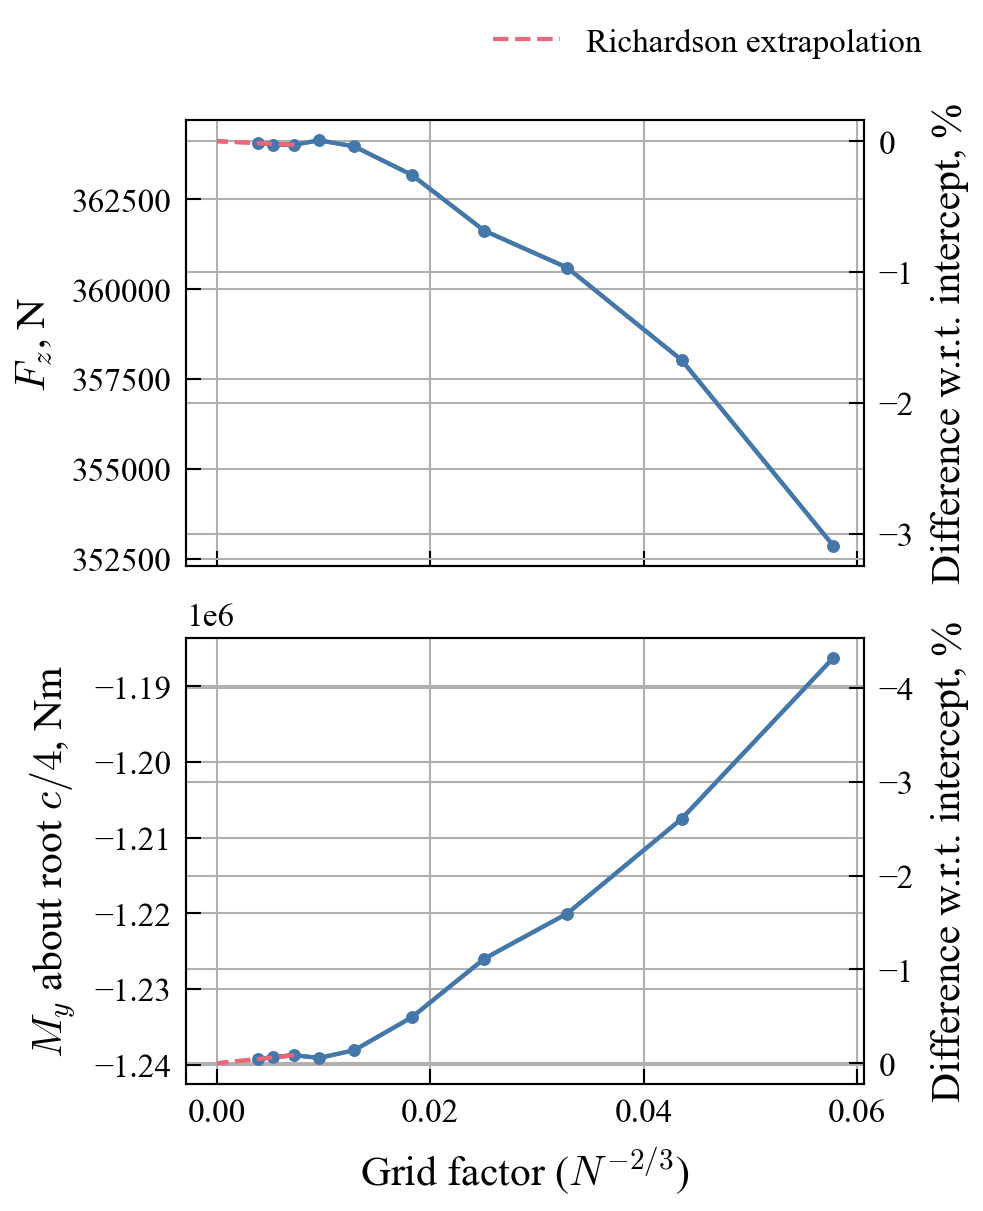

In [11]:
from scipy.stats import linregress

# Define the array with the number of elements for each aerodynamic mesh and
# initiliaze arrays to store the normal force and the moment about the root
# quarter chord point
no_elements_array = np.array([
    72, 110, 168, 252, 405, 684, 1065, 1620, 2599, 4147])
grid_factors = no_elements_array**(-2/3)
normal_force_array = np.empty_like(no_elements_array, dtype=float)
moment_array = np.empty_like(no_elements_array, dtype=float)

# Define name of monitor point
monpnt1_name = "C/4"

# Iterate through the different edge lengths
for i, no_elements in enumerate(no_elements_array):
    # Read monitor point data and store normal force and moment
    f06_filepath = os.path.join(
        ANALYSIS_DIRECTORY_PATH, f"sol_144_{no_elements}_aero_elements.f06")
    aerodynamic_loads = pynastran_utils.read_monitor_point_from_f06(
        f06_path=f06_filepath, monitor_point_name=monpnt1_name)
    normal_force_array[i] = aerodynamic_loads['CZ'][0]
    moment_array[i] = aerodynamic_loads['CMY'][0]

# Create figure with two subplots
fig, axes = plt.subplots(
    2, 1, sharex=True, figsize=(FIG_WIDTH_INCHES, FIG_HEIGHT_INCHES*1.5))

# Plot normal force vs grid factor
axes[0].computed_zorder = False
axes[0].plot(grid_factors, normal_force_array, 'o-')
axes[0].set_ylabel('$F_z$, N')
axes[0].grid(True)

# Plot moment about c/4 vs grid factor
axes[1].computed_zorder = False
axes[1].plot(grid_factors, moment_array, 'o-')
axes[1].set_ylabel('$M_y$ about root $c/4$, Nm')
axes[1].grid(True)
axes[1].set_xlabel('Grid factor ($N^{-2/3}$)')

# Extract the last three points of both plots to calculate the Richardson extrapolation
last_three_gf = grid_factors[-3:]
last_three_normal_forces = normal_force_array[-3:]
last_three_moments = moment_array[-3:]

# Perform linear regression for normal force and moment and calculate intercepts of Richardson extrapolation lines
_, intercept_normal_force, _, _, _ = linregress(
    last_three_gf, last_three_normal_forces)
_, intercept_moment, _, _, _ = linregress(last_three_gf, last_three_moments)

# Plot Richardson extrapolation lines
extrapolation_line = axes[0].plot(
    [grid_factors[-3], 0],
    [last_three_normal_forces[0], intercept_normal_force],
    '--', label='Richardson extrapolation')
axes[1].plot(
    [grid_factors[-3], 0],
    [last_three_moments[0], intercept_moment],
    '--')

# Define function to calculate percentage difference
twin_scale = lambda y, y0: (y/y0 - 1)*100

# Create list of forces and moments and list of intercepts
forces_moments_list = [normal_force_array, moment_array]
intercepts_list = [intercept_normal_force, intercept_moment]

# Loop over subplots to add twin axes
for i, intercept in enumerate(intercepts_list):
    # Create twin axes
    twin_ax = axes[i].twinx()
    
    # Plot percentage difference
    twin_ax.plot(
        grid_factors,
        twin_scale(forces_moments_list[i], intercept),
        'o-')
    
    # Set labels and grid for twin axes
    twin_ax.set_ylabel('Difference w.r.t. intercept, %')
    twin_ax.grid(True)
    
    # Plot Richardson extrapolation lines on twin axes
    twin_ax.plot(
        [grid_factors[-3], 0],
        twin_scale(
            np.array([forces_moments_list[i][-3], intercept]), intercept),
        '--')

# Invert y-axis of moments twin axes
twin_ax.invert_yaxis()
ymin, ymax = axes[i].get_ylim()  # get y-axis limits of main axes
twin_ax.set_ylim(twin_scale(ymin, intercept), twin_scale(ymax, intercept))  # set y-axis limits of twin axes to match percentage differences

# Add legend
fig.legend(
    handles=extrapolation_line, bbox_to_anchor=(.97, 1.1))

# Show and save plot
plt.show()
fig.savefig(os.path.join(
    FIGURES_DIRECTORY_PATH, "AeroMeshConvergenceStudy.pdf"))

Plot doublet lattice mesh.

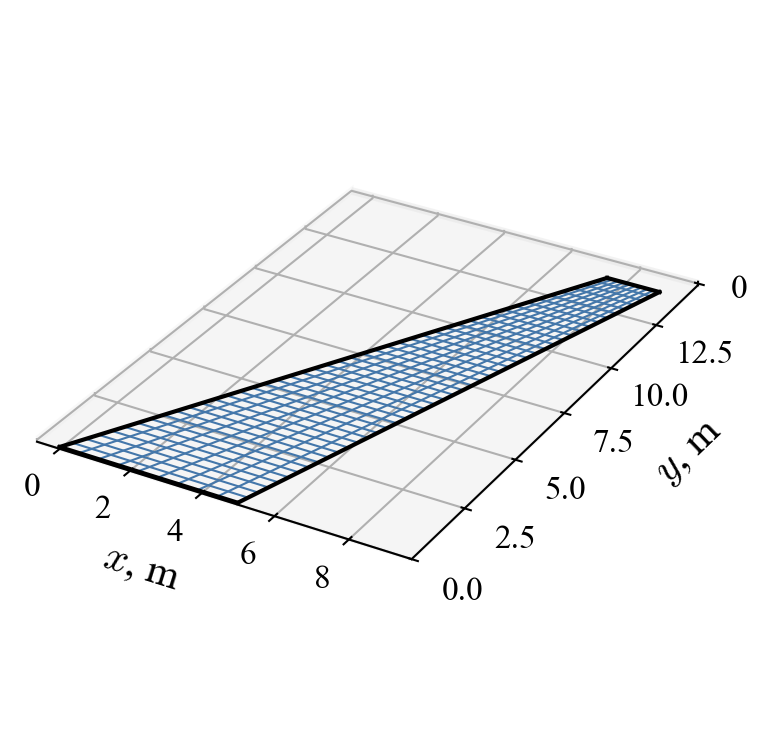

In [12]:
# Wing geometry parameters
root_chord = 5.0  # meters
tip_chord = 1.5   # meters
root_le = np.array([0.0, 0.0, 0.0])  # root leading edge position
tip_le = np.array([7.5, 14.0, 0.0])  # tip leading edge position

# Mesh discretization
nspan = 45   # number of spanwise elements
nchord = 9   # number of chordwise elements

# Create spanwise and chordwise points
eta = np.linspace(0, 1, nspan + 1)
xi = np.linspace(0, 1, nchord + 1)

# Initialize arrays for mesh points
X = np.zeros((nspan + 1, nchord + 1))
Y = np.zeros((nspan + 1, nchord + 1))
Z = np.zeros((nspan + 1, nchord + 1))

# Generate mesh points
for i, e in enumerate(eta):
    # Interpolate leading edge position
    le_point = root_le + e * (tip_le - root_le)
    
    # Interpolate local chord
    local_chord = root_chord + e * (tip_chord - root_chord)
    
    # Generate points along chord
    for j, x in enumerate(xi):
        chord_point = le_point + np.array([local_chord * x, 0, 0])
        X[i, j] = chord_point[0]
        Y[i, j] = chord_point[1]
        Z[i, j] = chord_point[2]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot mesh lines
for i in range(nspan + 1):
    ax.plot(X[i, :], Y[i, :], Z[i, :], color=COLORS[0], linewidth=0.5)
for j in range(nchord + 1):
    ax.plot(X[:, j], Y[:, j], Z[:, j], color=COLORS[0], linewidth=0.5)

# Plot edges with thicker lines
ax.plot(X[0, :], Y[0, :], Z[0, :], 'k-', linewidth=1)  # Root
ax.plot(X[-1, :], Y[-1, :], Z[-1, :], 'k-', linewidth=1)  # Tip
ax.plot(X[:, 0], Y[:, 0], Z[:, 0], 'k-', linewidth=1)  # Leading edge
ax.plot(X[:, -1], Y[:, -1], Z[:, -1], 'k-', linewidth=1)  # Trailing edge

# Set axis labels
ax.set_xlabel('$x$, m')
ax.set_ylabel('$y$, m')
ax.set_zlabel('$z$, m')

# Set y-axis limits
ax.set_ylim(0, 14.9)

# Set equal aspect ratio
ax.set_aspect('equal', 'box')

# Add grid
ax.grid(True)

# Show plot
ax.set_zticks([0.])
adjust_3d_plot(ax)
plt.show()

# Save figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "DoubletLatticeMesh.pdf"))

Plot the initial incidence of the chordwise doublet lattice panels to account for the airfoil camber.

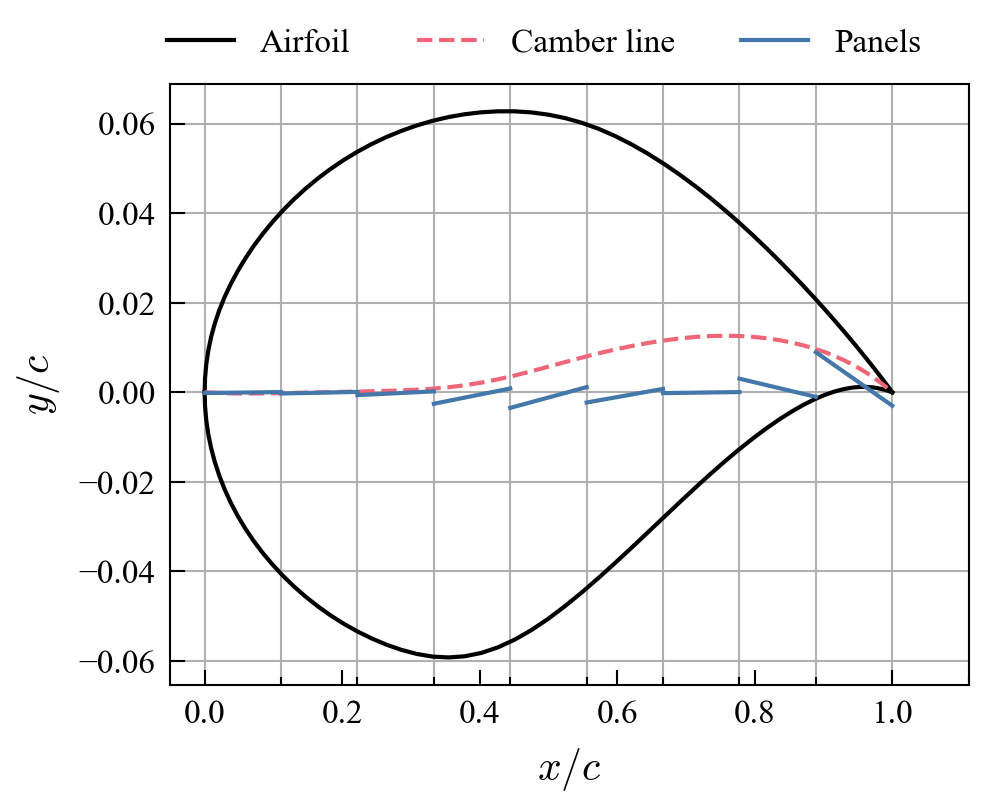

In [13]:
from scipy.interpolate import interp1d

# Read the data, skipping the first line (header)
data = np.loadtxt(AIRFOIL_PATH, skiprows=1)

# Separate x and y coordinates
x, y = data[:, 0], data[:, 1]

# Find the point where the profile wraps around (trailing edge to leading edge)
# This is typically where x starts increasing again
dx = np.diff(x)
wrap_idx = np.where(dx > 0)[0][0]

# Separate upper and lower surfaces
x_upper = x[:wrap_idx+1]
y_upper = y[:wrap_idx+1]
x_lower = x[wrap_idx:]
y_lower = y[wrap_idx:]

# Create interpolation functions for upper and lower surfaces
# Use cubic interpolation for smoothness
f_upper = interp1d(x_upper, y_upper, kind='cubic')
f_lower = interp1d(x_lower, y_lower, kind='cubic')

# Create x points for camber line
# Use the overlapping x-range between upper and lower surfaces
x_camber = np.unique(np.concatenate((x_upper, x_lower)))

# Calculate camber line (mean line between upper and lower surfaces)
y_camber = (f_upper(x_camber) + f_lower(x_camber)) / 2

# Create interpolation function for camber line
f_camber = interp1d(x_camber, y_camber, kind='cubic')

# Calculate segment size
segment_length = 1.0 / nchord

# Calculate three-quarter points for each segment
x_positions = np.array([
    i * segment_length + 0.75 * segment_length for i in range(nchord)])

# Small delta for numerical differentiation
dx = 1e-6

# Calculate slopes using central difference
slopes = np.zeros(nchord)
for i, x in enumerate(x_positions):
    # Ensure we don't go outside the interpolation range
    if x + dx > 1.0:
        # Use backward difference at the end
        dy = f_camber(x) - f_camber(x - dx)
    elif x - dx < 0.0:
        # Use forward difference at the start
        dy = f_camber(x + dx) - f_camber(x)
    else:
        # Use central difference
        dy = f_camber(x + dx/2) - f_camber(x - dx/2)
    # Calculate slope in radians
    slopes[i] = np.arctan2(dy, dx)
    
# Create figure
fig, ax = plt.subplots()
    
# Plot airfoil surface
airfoil_line = ax.plot(x_upper, y_upper, 'k-', label='Airfoil')
ax.plot(x_lower, y_lower, 'k-')

# Plot camber line
camber_line = ax.plot(
    x_camber, y_camber, '--', color=UNSTABLE_COLOR, label='Camber line')

# Add panels with incidence angle
for x, slope in zip(x_positions, slopes):
        panel_line = ax.plot(
            [x - 3/4*segment_length, x + segment_length/4], 
            [-np.tan(slope) * 3/4*segment_length,\
                np.tan(slope) * segment_length/4],
            color=COLORS[0], label='Panels')

# Set axis labels
ax.set_xlabel('$x/c$')
ax.set_ylabel('$y/c$')

# Customize ticks and grid lines
ax.set_xticks(np.arange(0., 1. + segment_length, segment_length), minor=True)
ax.grid(visible=True, axis='y')
ax.grid(visible=True, axis='x', which='minor')
ax.axvline(
    x=0, color=plt.rcParams['grid.color'],
    linewidth=plt.rcParams['grid.linewidth'], zorder=0)
ax.axvline(
    x=1, color=plt.rcParams['grid.color'],
    linewidth=plt.rcParams['grid.linewidth'], zorder=0)

# Add legend
fig.legend(
    handles=[airfoil_line[0], camber_line[0], panel_line[0]], ncol=3,
    bbox_to_anchor=(.97, 1.1))

# Show and save plot
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "AirfoilPanels.pdf"))

Print benchmark linear structural analysis results.

In [14]:
from itertools import compress
from resources.optimization_utils import compute_ks_function

def find_intersection_nodes(layout, part_names):
    # Store face descriptions in a numpy array
    descriptions = np.array(layout.faceDescript)

    # Find the nodes' ids of each part
    part_nodes_ids = [np.array([])]*len(part_names)
    for i, name in enumerate(part_names):
        mask = np.char.find(descriptions, name) >= 0
        nodes_lindex = list(compress(layout.elemTopo.lIndex, mask))
        part_nodes_ids[i] = np.unique(
            np.concatenate([arr.flatten() for arr in nodes_lindex]) + 1)

    # Find the intersection nodes' ids
    intersection_nodes_ids = part_nodes_ids[0]
    for i in range(1, len(part_names)):
        intersection_nodes_ids = np.intersect1d(
            intersection_nodes_ids, part_nodes_ids[i], assume_unique=True)

    # Return the intersection nodes' ids
    return intersection_nodes_ids

def find_tip_nodes(layout, bdf):
    # Find the ids of the intersection nodes between the upper skin, rib and spar
    intersection_nodes_ids = find_intersection_nodes(
        layout, ["U_SKIN", "RIB", "SPAR"])

    # Create a (N,3) array of coordinates for the intersection nodes
    intersection_nodes_xyz_array = np.vstack(
        [bdf.nodes[node_id].xyz for node_id in intersection_nodes_ids])

    # Mask to find the nodes on the tip rib
    tip_nodes_mask = np.abs(
        intersection_nodes_xyz_array[:, 1] - layout.X[-1, 0, 1]
        ) < NODE_TOLERANCE

    # Return the ids and coordinates of the tip nodes
    return intersection_nodes_ids[tip_nodes_mask],\
        intersection_nodes_xyz_array[tip_nodes_mask]

def calculate_tip_deflection(node_1_disp, node_2_disp):
    node_1_disp = np.atleast_2d(node_1_disp)
    node_2_disp = np.atleast_2d(node_2_disp)
    delta_z_tip = (node_1_disp[:, 2] + node_2_disp[:, 2])/2
    return delta_z_tip

def calculate_tip_twist(
    node_1_coords, node_2_coords, node_1_disp, node_2_disp):
    node_1_disp = np.atleast_2d(node_1_disp)
    node_2_disp = np.atleast_2d(node_2_disp)
    delta_theta_tip = np.arctan(
        ((node_2_coords[2] + node_2_disp[:, 2]) -\
            (node_1_coords[2] + node_1_disp[:, 2]))/\
        ((node_2_coords[0] + node_2_disp[:, 0]) -\
            (node_1_coords[0] + node_1_disp[:, 0]))) -\
        np.arctan((node_2_coords[2] - node_1_coords[2])/\
            (node_2_coords[0] - node_1_coords[0]))
    return delta_theta_tip

# Find the tip nodes of the original mesh
target_struct_element_length = 53e-3  # [m]
layout = wingGeometry.create_layout(target_length=target_struct_element_length)
layout.finalize()
sol_105_op2 = read_op2(
    op2_filename=os.path.join(
        ANALYSIS_DIRECTORY_PATH, "sol_105_benchmark_structural.op2"),
    load_geometry=True, debug=None)
tip_nodes_ids, tip_nodes_coords = find_tip_nodes(layout, sol_105_op2)
    
# Find tip deflection
tip_nodes_disp = pynastran_utils.read_displacement_from_op2(
    op2=sol_105_op2, node_ids=tip_nodes_ids)
tip_deflection = calculate_tip_deflection(
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID])

# Find tip twist
tip_twist = calculate_tip_twist(
    tip_nodes_coords[1],
    tip_nodes_coords[0],
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID])

# Find total strain energy

# Find material factor of safety
max_stress = np.max(sol_105_op2.op2_results.stress.cquad4_stress[
    FIRST_SUBCASE_ID].data[0, :, 7])
material_strength_factor = wingGeometry.yieldStrength/max_stress

# Print results
print(f"""
Benchmark linear structural analysis results:
- Tip deflection: {tip_deflection[-1]:.2e} m
- Tip twist: {np.rad2deg(tip_twist[-1]):.2f} deg
- Total strain energy:
- Material strength factor: {material_strength_factor:.2f}
- Buckling load factor: {blf_converged_mesh:.2f}""")

pyGeo Initialization Type is: iges
Found 6 surfaces in Iges File.
Projecting Super Nodes...
Projecting All Nodes...
Setting up Ribs...
Setting up Spars...
Setting up Skins and Stringers...
Setting up Spar Bars
Setting up Rib Bars
Computing Topology and Numbering...
Unique Nodes: 45483
Total Nodes: 65046



Benchmark linear structural analysis results:
- Tip deflection: 2.44e+00 m
- Tip twist: 5.46 deg
- Total strain energy:
- Material strength factor: 0.66
- Buckling load factor: 0.48


Print benchmark nonlinear structural analysis results.

In [15]:
# Find tip deflection at first instability
sol_106_op2 = sol_106_op2_dict["original mesh"]
_, _, tip_nodes_disp = pynastran_utils.read_load_displacement_history_from_op2(
    op2=sol_106_op2, node_ids=tip_nodes_ids)
tip_deflection = calculate_tip_deflection(
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID][
        first_negative_eigenvalue_index, :],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID][
        first_negative_eigenvalue_index, :])

# Find tip twist
tip_twist = calculate_tip_twist(
    tip_nodes_coords[1],
    tip_nodes_coords[0],
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID][
        first_negative_eigenvalue_index, :],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID][
        first_negative_eigenvalue_index, :])

# Find total strain energy

# Find material factor of safety
first_subcase_key = next(iter(sol_106_op2.nonlinear_cquad4_stress))
max_stress = np.max(sol_106_op2.nonlinear_cquad4_stress[
    first_subcase_key].data[first_negative_eigenvalue_index, :, 5])
material_strength_factor = wingGeometry.yieldStrength/max_stress

# Print results
print(f"""
Benchmark nonlinear structural analysis results at first instability:
- Tip deflection: {tip_deflection[-1]:.2e} m
- Tip twist: {np.rad2deg(tip_twist[-1]):.2f} deg
- Total strain energy:
- Material strength factor: {material_strength_factor:.2f}
- Buckling load factor: {blf_converged_mesh:.2f}""")


Benchmark nonlinear structural analysis results at first instability:
- Tip deflection: 1.25e+00 m
- Tip twist: 2.76 deg
- Total strain energy:
- Material strength factor: 0.65
- Buckling load factor: 0.48


Plot $C_L-\alpha$ curve of the aerodynamic model at cruise condition.

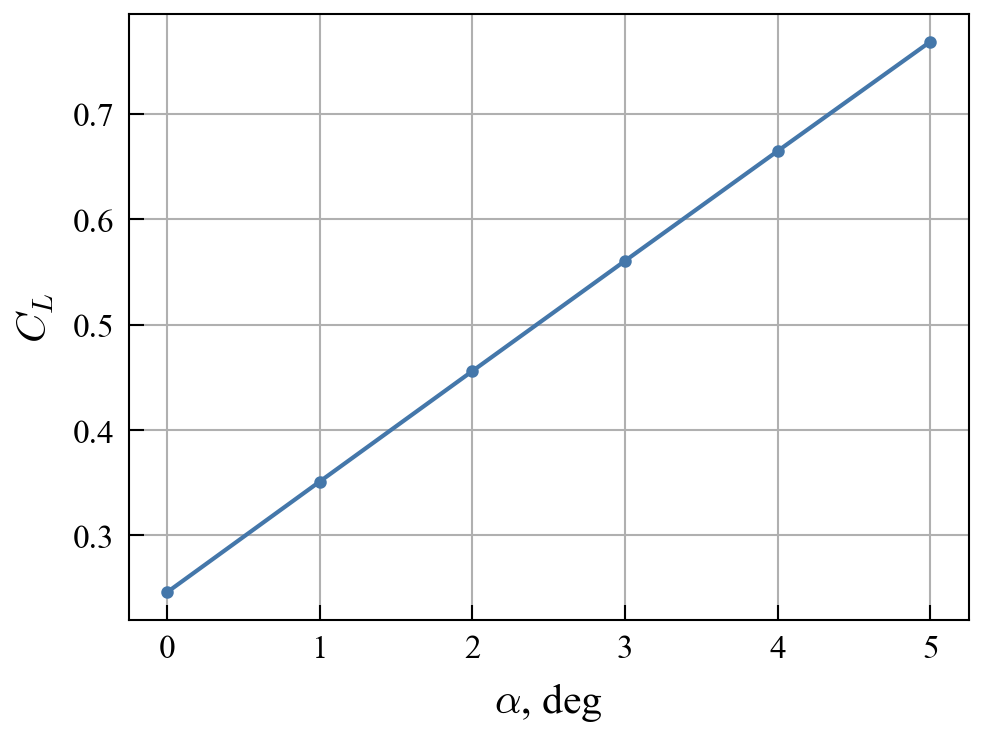

In [16]:
from ambiance import Atmosphere  # class for stabdard atmosphere calculations

def mach_altitude_to_dynamic_pressure(mach, altitude):
    # Find air density and speed of sound
    rho_air = Atmosphere(altitude).density[0]  # air density
    speed_of_sound = Atmosphere(altitude).speed_of_sound[0]  # speed of sound
    # Calculate air speed
    air_speed = mach*speed_of_sound
    # Calculate dynamic pressure
    return 0.5*rho_air*air_speed**2

# Find dynamic pressure at cruise conditions
cruise_altitude = 10400  # [m]
cruise_mach = 0.77
cruise_dynamic_pressure = mach_altitude_to_dynamic_pressure(
        cruise_mach, cruise_altitude)

# Loop over angles of attack
benchmark_aerodynamic_aoa = np.arange(0., 6.)  # angles of attack [deg]
lift_coefficient_array = np.empty_like(benchmark_aerodynamic_aoa)
for i, aoa in enumerate(benchmark_aerodynamic_aoa):
    # Read monitor point data and store normal force and moment
    aerodynamic_loads = pynastran_utils.read_monitor_point_from_f06(
        f06_path=os.path.join(
            ANALYSIS_DIRECTORY_PATH,
            f"sol_144_benchmark_aerodynamic_{aoa:.0f}deg.f06"),
        monitor_point_name=monpnt1_name)
    normal_force = aerodynamic_loads['CZ'][0]
    lift = normal_force*np.cos(np.deg2rad(aoa))
    lift_coefficient_array[i] = lift/(
        cruise_dynamic_pressure*wingGeometry.planformArea)

# Create figure with two subplots
fig, ax = plt.subplots()

# Plot normal force vs grid factor
ax.plot(benchmark_aerodynamic_aoa, lift_coefficient_array, 'o-')
ax.set_xlabel(r'$\alpha$, deg')
ax.set_ylabel('$C_L$')
ax.grid(True)
plt.show()
fig.savefig(os.path.join(
    FIGURES_DIRECTORY_PATH, "BenchmarkLiftCoefficient.pdf"))

Find lift coefficient at zero angle of attack and lift coefficient slope.

In [17]:
cl_zero = lift_coefficient_array[0]
cl_alpha = (lift_coefficient_array[-1] - cl_zero)/\
    np.deg2rad(benchmark_aerodynamic_aoa[-1])
print(f"""
Benchmark aerodynamic analysis results:
- Lift coefficient at zero angle of attack: {cl_zero:.2f}
- Lift curve slope: {cl_alpha:.2f} [1/rad]""")


Benchmark aerodynamic analysis results:
- Lift coefficient at zero angle of attack: 0.25
- Lift curve slope: 5.99 [1/rad]


Print benchmark aeroelastic analysis results.

In [18]:
# Calculate lift coefficient
aerodynamic_loads = pynastran_utils.read_monitor_point_from_f06(
    f06_path=os.path.join(
        ANALYSIS_DIRECTORY_PATH, "sol_144_benchmark_aeroelastic.f06"),
    monitor_point_name="AEROSG2D")
normal_force = aerodynamic_loads['CZ'][0]
lift = normal_force*np.cos(np.deg2rad(aoa))
lift_coefficient = lift/(cruise_dynamic_pressure*wingGeometry.planformArea)

# Find linear tip deflection
sol_105_op2 = read_op2(
    op2_filename=os.path.join(
        ANALYSIS_DIRECTORY_PATH, "sol_105_benchmark_aeroelastic.op2"),
    load_geometry=True, debug=None)
tip_nodes_disp = pynastran_utils.read_displacement_from_op2(
    op2=sol_105_op2, node_ids=tip_nodes_ids)
linear_tip_deflection = calculate_tip_deflection(
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID])[0]

# Find linear tip twist
linear_tip_twist = calculate_tip_twist(
    tip_nodes_coords[1],
    tip_nodes_coords[0],
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID])[0]

# Find linear total strain energy
linear_total_strain_energy = np.sum(
    sol_105_op2.cquad4_strain_energy[FIRST_SUBCASE_ID].data[0, :, 0])

# Find linear material factor of safety
max_stress = np.max(sol_105_op2.op2_results.stress.cquad4_stress[
    FIRST_SUBCASE_ID].data[0, :, 7])
linear_material_strength_factor = wingGeometry.yieldStrength/max_stress

# Find buckling load factor
eigenvectors_subcase_id = next(iter(sol_105_op2.eigenvectors))
buckling_load_factor = sol_105_op2.eigenvectors[eigenvectors_subcase_id].eigr

# Find nonlinear tip deflection
input_name = "sol_106_benchmark_aeroelastic"
sol_106_op2 = read_op2(
    op2_filename=os.path.join(ANALYSIS_DIRECTORY_PATH, f"{input_name}.op2"),
    load_geometry=True, debug=None)
_, _, tip_nodes_disp = pynastran_utils.read_load_displacement_history_from_op2(
    op2=sol_106_op2, node_ids=tip_nodes_ids)
nonlinear_tip_deflection = calculate_tip_deflection(
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID])

# Find nonlinear tip twist
nonlinear_tip_twist = calculate_tip_twist(
    tip_nodes_coords[1],
    tip_nodes_coords[0],
    tip_nodes_disp[tip_nodes_ids[1]][FIRST_SUBCASE_ID],
    tip_nodes_disp[tip_nodes_ids[0]][FIRST_SUBCASE_ID])

# Find nonlinear total strain energy

# Find nonlinear material factor of safety
first_subcase_key = next(iter(sol_106_op2.nonlinear_cquad4_stress))
max_stress = np.max(
    sol_106_op2.nonlinear_cquad4_stress[first_subcase_key].data[:, :, 5])
nonlinear_material_strength_factor = wingGeometry.yieldStrength/max_stress

# Print results
print(f"""
Benchmark aerodynamic analysis results:
- Lift coefficient: {lift_coefficient:.2f}
- Linear tip deflection: {linear_tip_deflection:.2f} m
- Linear tip twist: {np.rad2deg(linear_tip_twist):.2f} deg
- Linear total strain energy: {linear_total_strain_energy:.2e} J
- Linear material strength factor: {linear_material_strength_factor:.2f}
- Linear buckling load factor: {buckling_load_factor:.2f}
- Nonlinear tip deflection: {nonlinear_tip_deflection[-1]:.2f} m
- Nonlinear tip twist: {np.rad2deg(nonlinear_tip_twist[-1]):.2f} deg
- Nonlinear total strain energy:
- Nonlinear material strength factor: {nonlinear_material_strength_factor:.2f}""")


Benchmark aerodynamic analysis results:
- Lift coefficient: 0.56
- Linear tip deflection: 0.62 m
- Linear tip twist: 1.26 deg
- Linear total strain energy: 3.77e+04 J
- Linear material strength factor: 2.20
- Linear buckling load factor: 1.70
- Nonlinear tip deflection: 0.62 m
- Nonlinear tip twist: 1.26 deg
- Nonlinear total strain energy:
- Nonlinear material strength factor: 2.24


Plot load-displacement diagram obtained for the benchmark aeroelastic analysis.

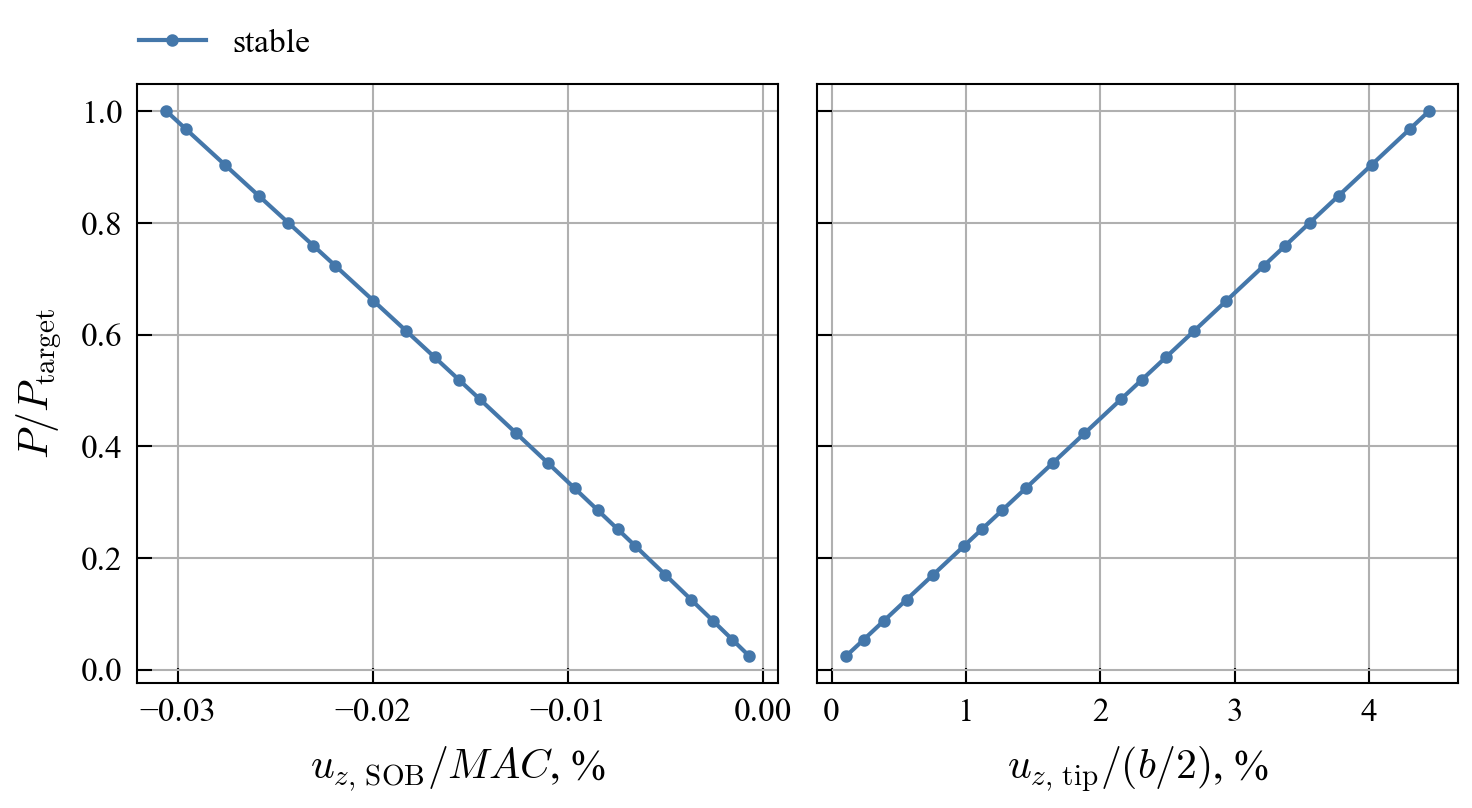

In [19]:
# Read load and SOB displacement history
sob_node_id = max_disp_node_id_dict["original mesh"]
load_factors, _, sob_displacements =\
        pynastran_utils.read_load_displacement_history_from_op2(
                op2=sol_106_op2, node_ids=[sob_node_id])

# Store displacements in a list
displacement_list = [
        sob_displacements[sob_node_id][FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX],
        nonlinear_tip_deflection]

# Define reference lengths to nondimensionalize displacements
reference_lengths = [wingGeometry.meanAerodynamicChord, wingGeometry.semiSpan]

# Define labels for displacements and reference lengths
displacement_labels = ["SOB", "tip"]
reference_lengths_labels = ["MAC", r"\left(b/2\right)"]

# Read eigenvalues from f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(
        f06_filepath=os.path.join(
                ANALYSIS_DIRECTORY_PATH, f"{input_name}.f06"))

# Create figure for load-displacement diagram
fig, axes = plt.subplots(
        1, 2, sharey=True, figsize=(FIG_WIDTH_INCHES*1.5, FIG_HEIGHT_INCHES))

# Loop over the two displacements and plot the load-displacement diagram
for i, displacements in enumerate(displacement_list):
        plot_utils.plot_2d_load_displacements_stability(
                axes=axes[i],
                displacements=displacements/reference_lengths[i]*100,
                loads=load_factors[FIRST_SUBCASE_ID],
                eigenvalues=eigenvalues,
                marker=MARKERS[0], color=COLORS[0])
        # Set grid and x-axis label
        axes[i].grid(visible=True)
        axes[i].set_xlabel(
                f"$u_{{z,\,\mathrm{{{displacement_labels[i]}}}}}/{reference_lengths_labels[i]}$, %")

# Set y-axis label
axes[0].set_ylabel("$P/P_\mathrm{target}$")

# Add proxy artists for the legend
stable_line = Line2D(
        [0], [0], linestyle='-', marker=MARKERS[0], color=COLORS[0],
        label="stable")
fig.legend(handles=[stable_line], bbox_to_anchor=(.23, 1.1))

# Show and save plot
plt.show()
fig.savefig(os.path.join(
        FIGURES_DIRECTORY_PATH, "AeroelasticBenchmarkLoadDisplacementDiagram.pdf"))

Plot objective and constraints history for the linear buckling optimization.

/mnt/c/Users/qa21944/Github/phd-jupyter-notebooks/notebooks/resources/optimization_utils.py:425: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(


Requested variables at last iteration:
- pull_up_sol_105.mass: [1813.46743871]
- pull_up_sol_105.ks_stress: [-824832.]
- pull_up_sol_105.ks_buckling: [-0.00160323]
- push_down_sol_105.ks_stress: [-2.45225792e+08]
- push_down_sol_105.ks_buckling: [-0.50926051]
- pull_up_lf_comp.load_factor: [2.49423696]
- push_down_lf_comp.load_factor: [-1.00483402]


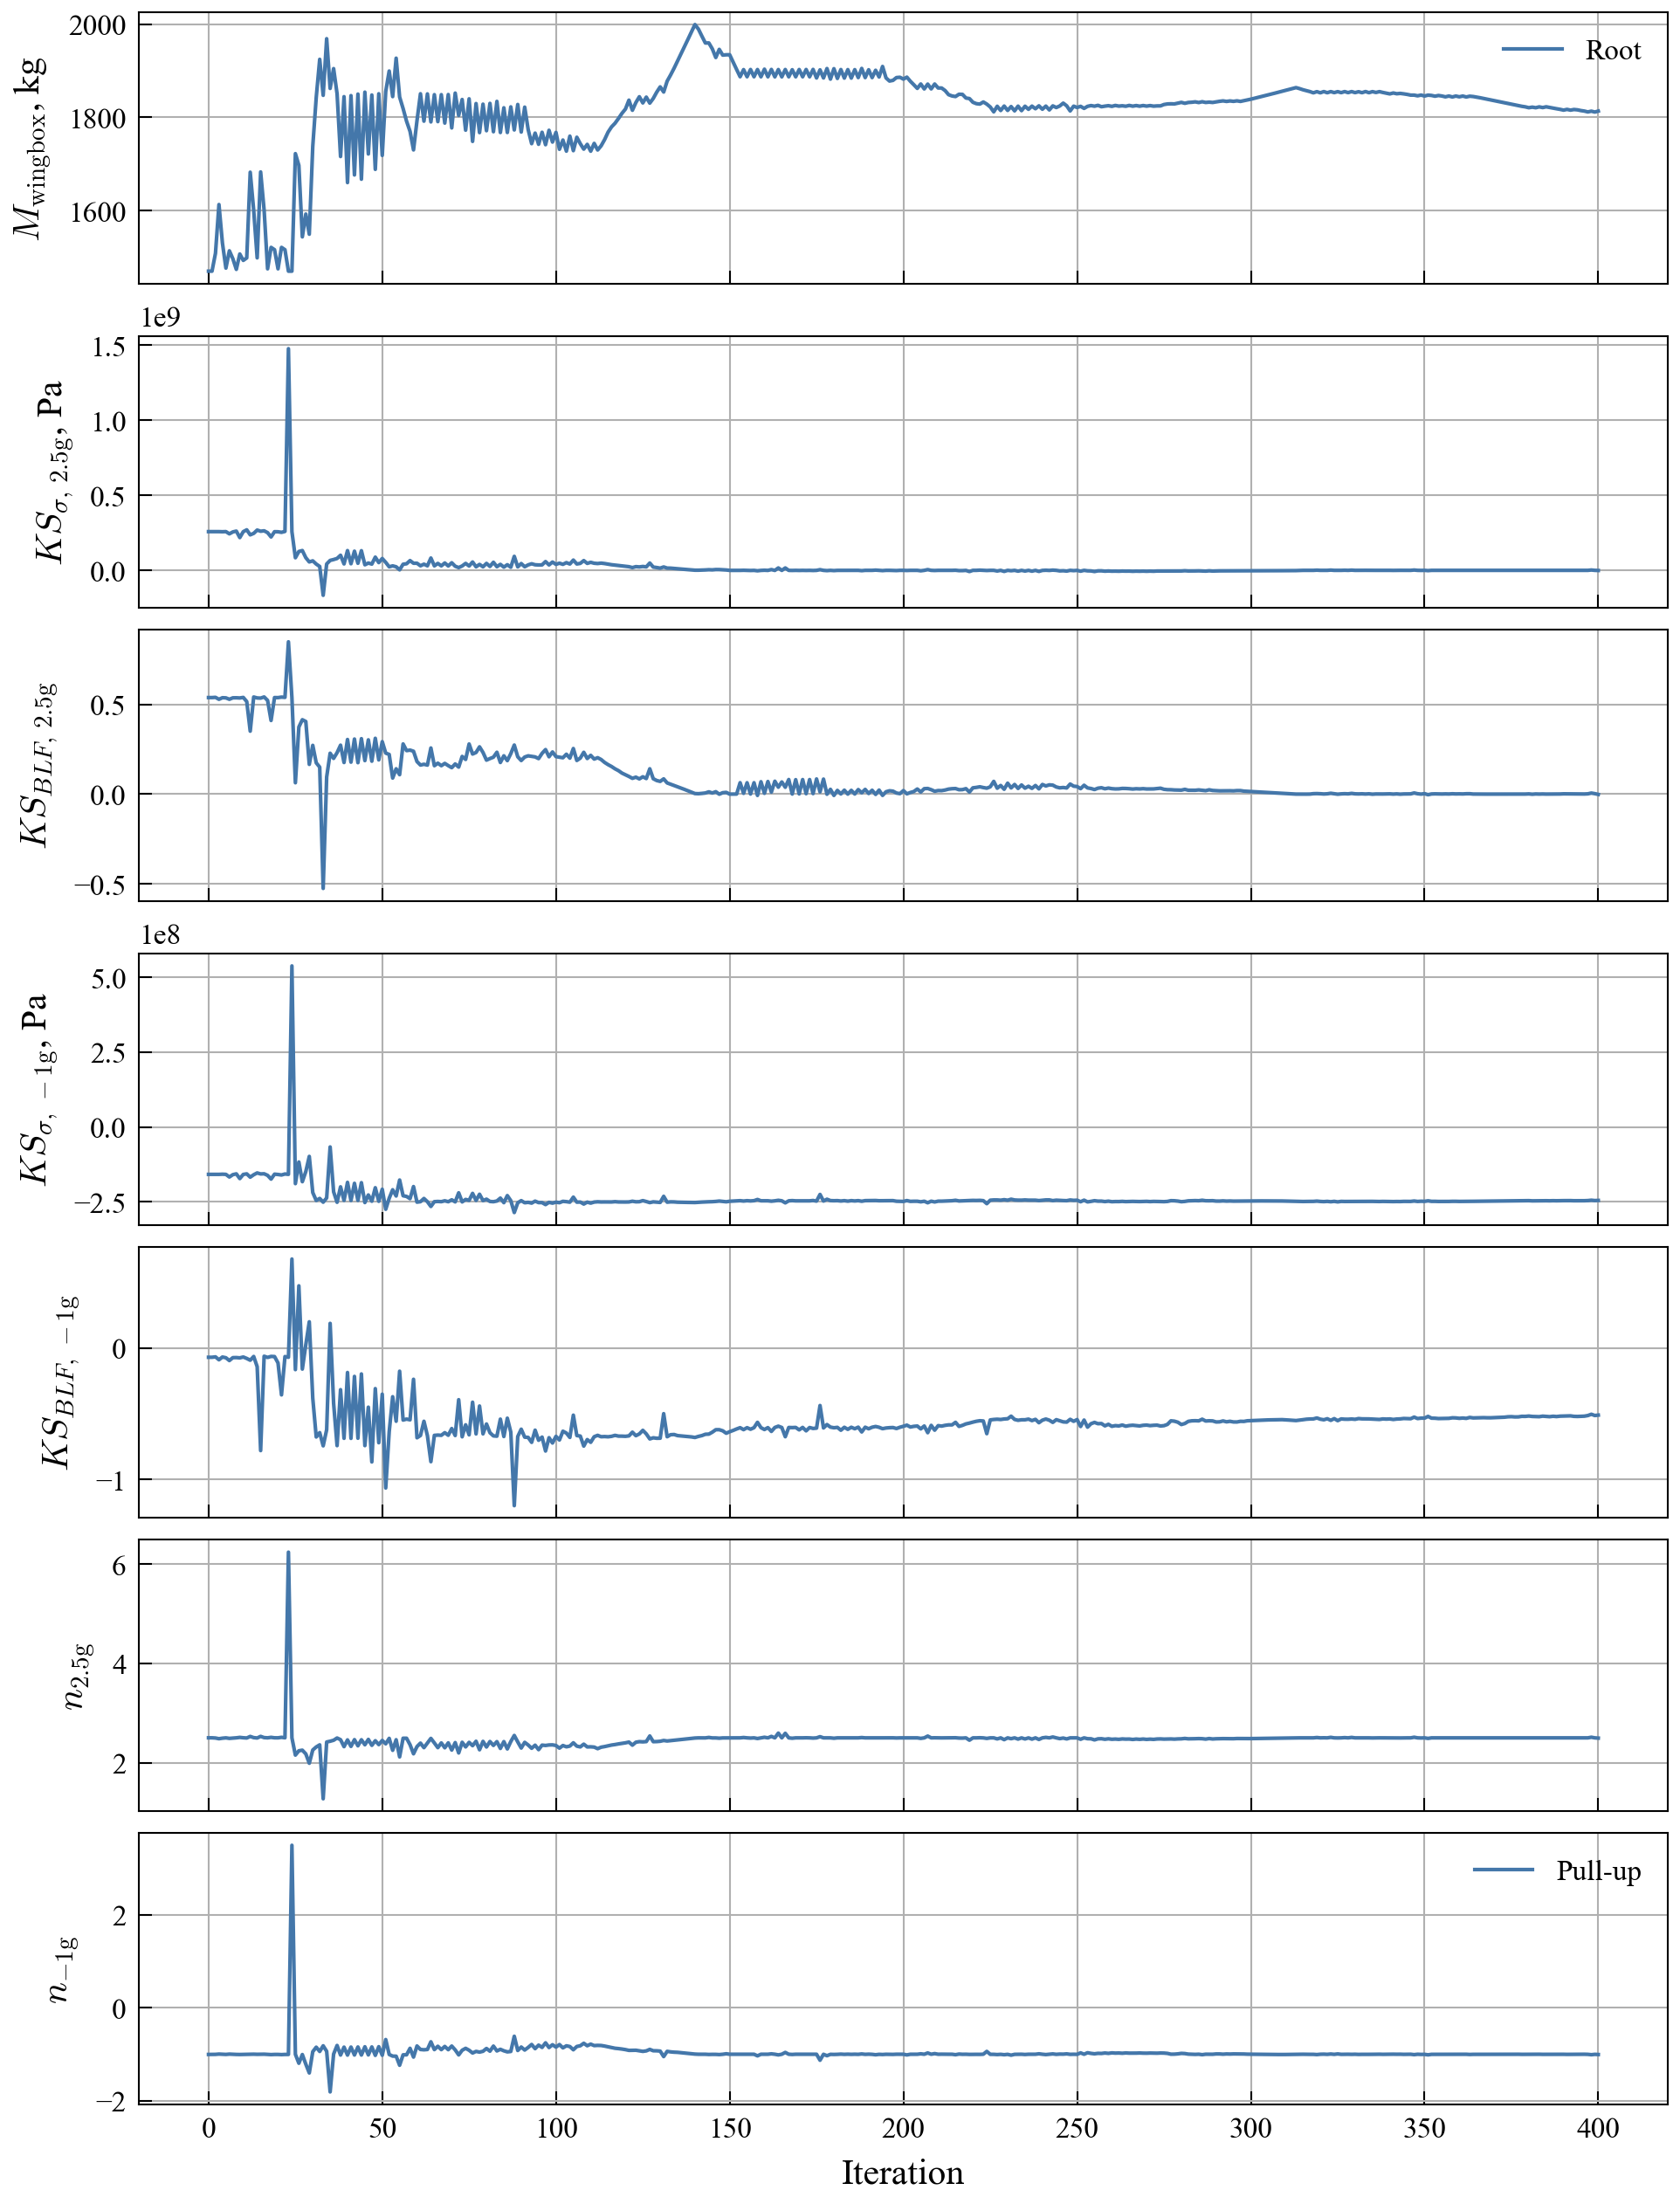

In [ ]:
from resources.optimization_utils import plot_optimization_history

recorder_filepath = os.path.join(
    ANALYSIS_DIRECTORY_PATH, "linear_optimization.sql")

# Plot histories of objective and constraints
objective_constraints = [
    "pull_up_sol_105.mass",
    "pull_up_sol_105.ks_stress",
    "pull_up_sol_105.ks_buckling",
    "push_down_sol_105.ks_stress",
    "push_down_sol_105.ks_buckling",
    "pull_up_lf_comp.load_factor",
    "push_down_lf_comp.load_factor"]
objective_constraints_labels = [
    "$M_{\mathrm{wingbox}}$, kg",
    "$KS_{\sigma,\,2.5\mathrm{g}}$, Pa",
    "$KS_{BLF,\,2.5\mathrm{g}}$",
    "$KS_{\sigma,\,-1\mathrm{g}}$, Pa",
    "$KS_{BLF,\,-1\mathrm{g}}$",
    "$n_{2.5\mathrm{g}}$",
    "$n_{-1\mathrm{g}}$"]
fig, axes, objective_constraints_histories = plot_optimization_history(
    recorder_filepath=recorder_filepath,
    variable_names=objective_constraints,
    y_labels=objective_constraints_labels)

# Show and save figure
plt.show()
fig.savefig(os.path.join(
    FIGURES_DIRECTORY_PATH, "LinearBucklingOptimizationHistory.pdf"))

Plot critical buckling mode in the 2.5g maneuver flight condition for the linearly optimized design.

/mnt/c/Users/qa21944/Github/phd-jupyter-notebooks/notebooks/resources/plot_utils.py:622: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
/home/fmamitrotta/anaconda3/envs/aeroelastic-opt-benchmark/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


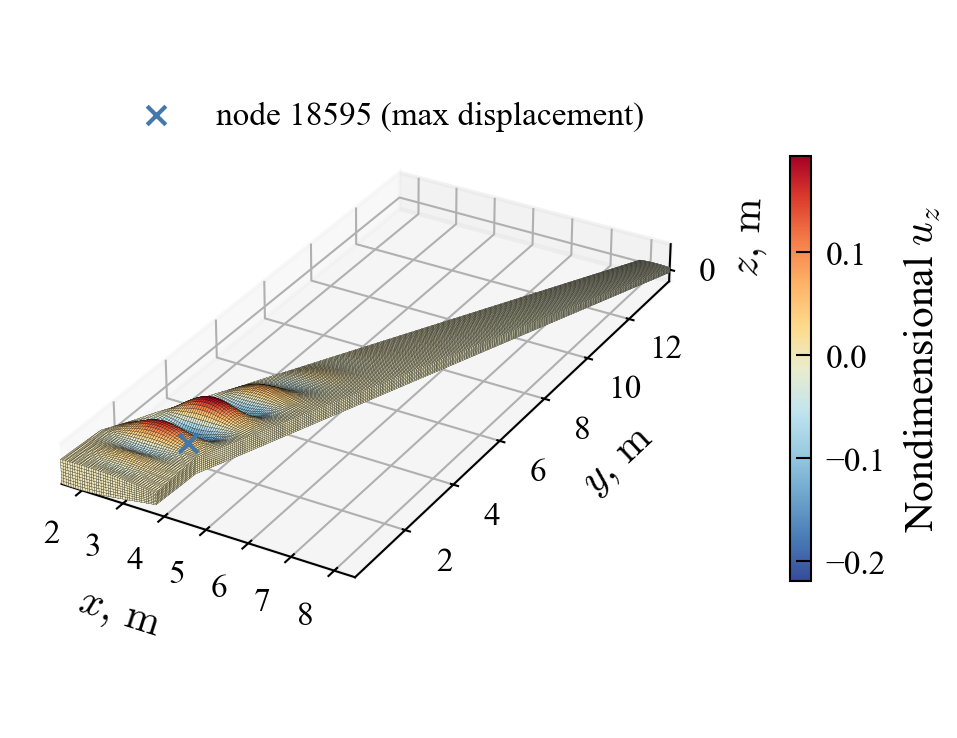

/tmp/ipykernel_1576701/1333698375.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(


In [21]:
# Read OP2 file of the converged mesh
input_name = "sol_105_pull_up"
sol_105_op2 = read_op2(
    op2_filename=os.path.join(ANALYSIS_DIRECTORY_PATH, f"{input_name}.op2"),
    load_geometry=True, debug=None)
    
# Plot critical buckling mode
amplification_factor = 2.
fig, ax, cbar = plot_utils.plot_eigenvector(
        op2=sol_105_op2, subcase_id=SECOND_SUBCASE_ID,
        displacement_component='tz', colormap='sunset',
        displacement_amplification_factor=amplification_factor,
        shrink_colorbar=.6, colorbar_pad=.09)

# Plot node where max displacement occurs and add node id to dictionary
plot_utils.plot_max_displacement_node(
    axes=ax, op2=sol_105_op2,
    displacement_amplification_factor=amplification_factor)

# Add legend, adjust plot appearance and show plot
ax.legend(bbox_to_anchor=(.93, .92))
ax.set_zticks([0.])
adjust_3d_plot(ax)
plt.show()

# Save figure
fig.savefig(
    os.path.join(FIGURES_DIRECTORY_PATH, "LinearOptCriticalBucklingMode.pdf"))

Plot spanwise lift distribution for the linearly optimized design in the maneuver flight conditions.

Requested variables at last iteration:
- maneuver_aoa: [ 8.61990969 -6.40813794]


/mnt/c/Users/qa21944/Github/phd-jupyter-notebooks/notebooks/resources/optimization_utils.py:425: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(


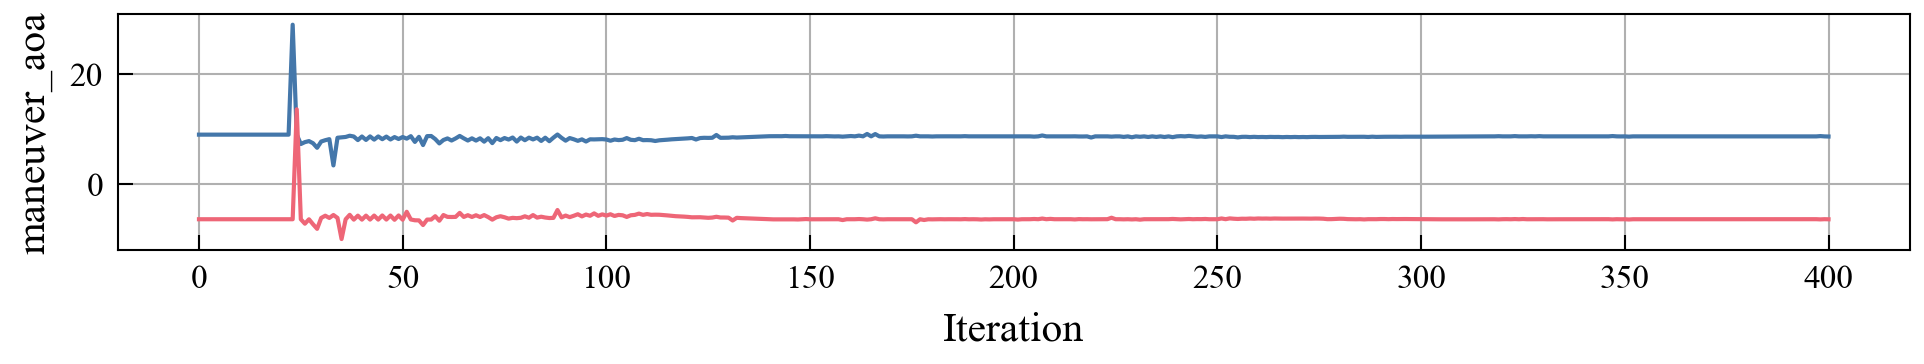

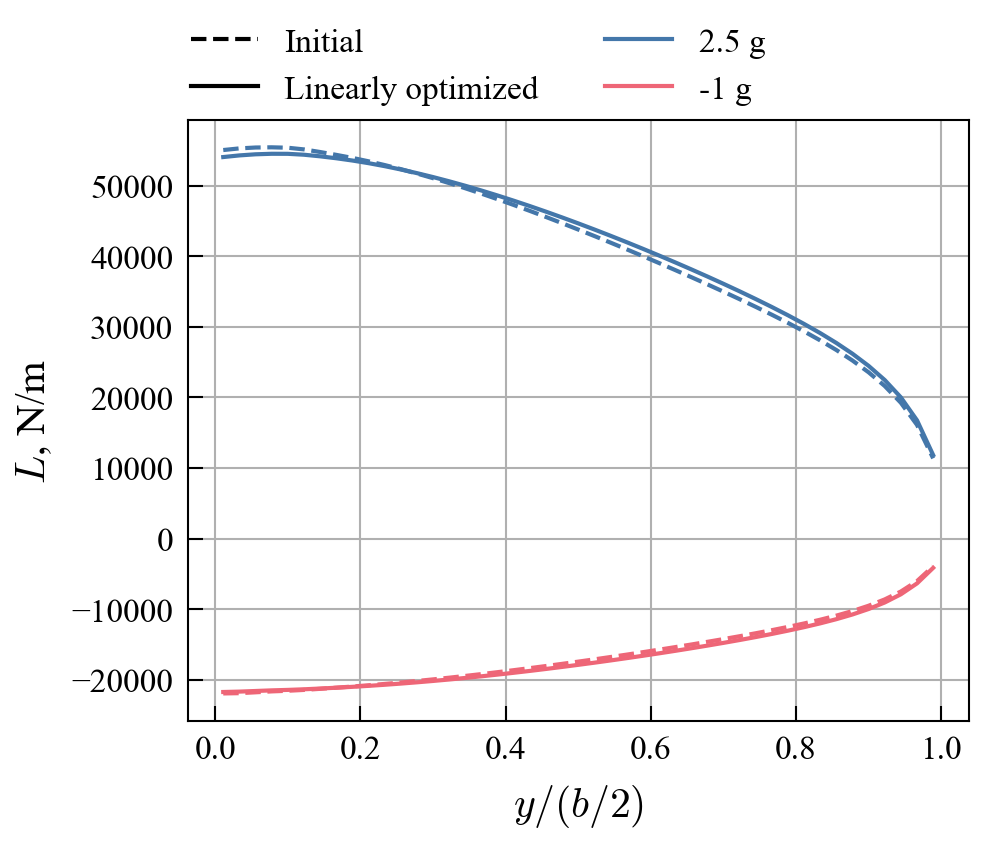

In [46]:
from pyNastran.f06.parse_trim import read_f06_trim

# Retrieve histories of maneuver angles of attack
_, _, maneuver_aoa_histories = plot_optimization_history(
    recorder_filepath=recorder_filepath,
    variable_names=["maneuver_aoa"])
plt.show()

# Calculate spanwise length of doublet lattice panels
panel_length = wingGeometry.semiSpan/nspan

# Create nondimensional spanwise coordinates
nondimensional_y_coords = np.linspace(
    panel_length/2, wingGeometry.semiSpan - panel_length/2, nspan)/\
        wingGeometry.semiSpan

# Create figure and axes
fig, ax = plt.subplots()

# Define input names, suffixes, colors and linestyles
input_names = ["sol_144_pull_up", "sol_144_push_down"]
suffixes = ["_start.f06", ".f06"]
aoa_indices = [0, -1]
colors = [COLORS[0], UNSTABLE_COLOR]
linestyles = ['--', '-']

# Loop over maneuvers
for i, input_name in enumerate(input_names):
    # Loop over initial and optimized designs
    for j, suffix in enumerate(suffixes):
        # Find maneuver angle of attack
        aoa = maneuver_aoa_histories["maneuver_aoa"][aoa_indices[j], i]
        
        # Read trim data from f06 file
        f06_filepath = os.path.join(
            ANALYSIS_DIRECTORY_PATH, f"{input_name}{suffix}")
        trim_data = read_f06_trim(f06_filepath)
        
        # Find spanwise lift distribution
        trim_key = next(iter(trim_data.aero_force))
        normal_forces = trim_data.aero_force[
            trim_key][1][:, 2].reshape(nspan, nchord).sum(axis=1)
        spanwise_lift = normal_forces*np.cos(np.deg2rad(aoa))/panel_length
        
        # Plot spanwise lift distribution
        ax.plot(
            nondimensional_y_coords,
            spanwise_lift,
            color=colors[i],
            linestyle=linestyles[j])
        
# Set axis labels and grid
ax.set_xlabel(r"$y/\left(b/2\right)$")
ax.set_ylabel("$L$, N/m")
ax.grid(visible=True)

# Create proxy artists for the legend
initial_line = Line2D(
    [0], [0], color='k', linestyle='--', label="Initial")
linear_opt_line = Line2D(
    [0], [0], color='k', linestyle='-', label="Linearly optimized")
pull_up_line = Line2D(
    [0], [0], color=COLORS[0], linestyle='-', label="2.5 g")
push_down_line = Line2D(
    [0], [0], color=UNSTABLE_COLOR, linestyle='-', label="-1 g")
fig.legend(
    handles=[initial_line, linear_opt_line, pull_up_line, push_down_line],
    ncol=2, bbox_to_anchor=(.81, 1.15))

# Show and save plot
plt.show()
fig.savefig(os.path.join(
    FIGURES_DIRECTORY_PATH, "SpanwiseLiftDistribution.pdf"))

Plot structural thickness distributions for the linearly optimized design.

/mnt/c/Users/qa21944/Github/phd-jupyter-notebooks/notebooks/resources/optimization_utils.py:425: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(


Requested variables at last iteration:
- ribs_interp.t_cp: [0.00486825 0.00361233 0.00483243]
- front_spar_interp.t_cp: [0.00696613 0.00702761 0.00565814]
- rear_spar_interp.t_cp: [0.00589217 0.01652053 0.00638352]
- top_skin_interp.t_cp: [0.00675639 0.01514661 0.00527775]
- bottom_skin_interp.t_cp: [0.00871073 0.01021535 0.00308247]
- top_stiffeners_interp.t_cp: [0.00547718 0.01000632 0.00657947]
- bottom_stiffeners_interp.t_cp: [0.0065602  0.00611888 0.00370548]


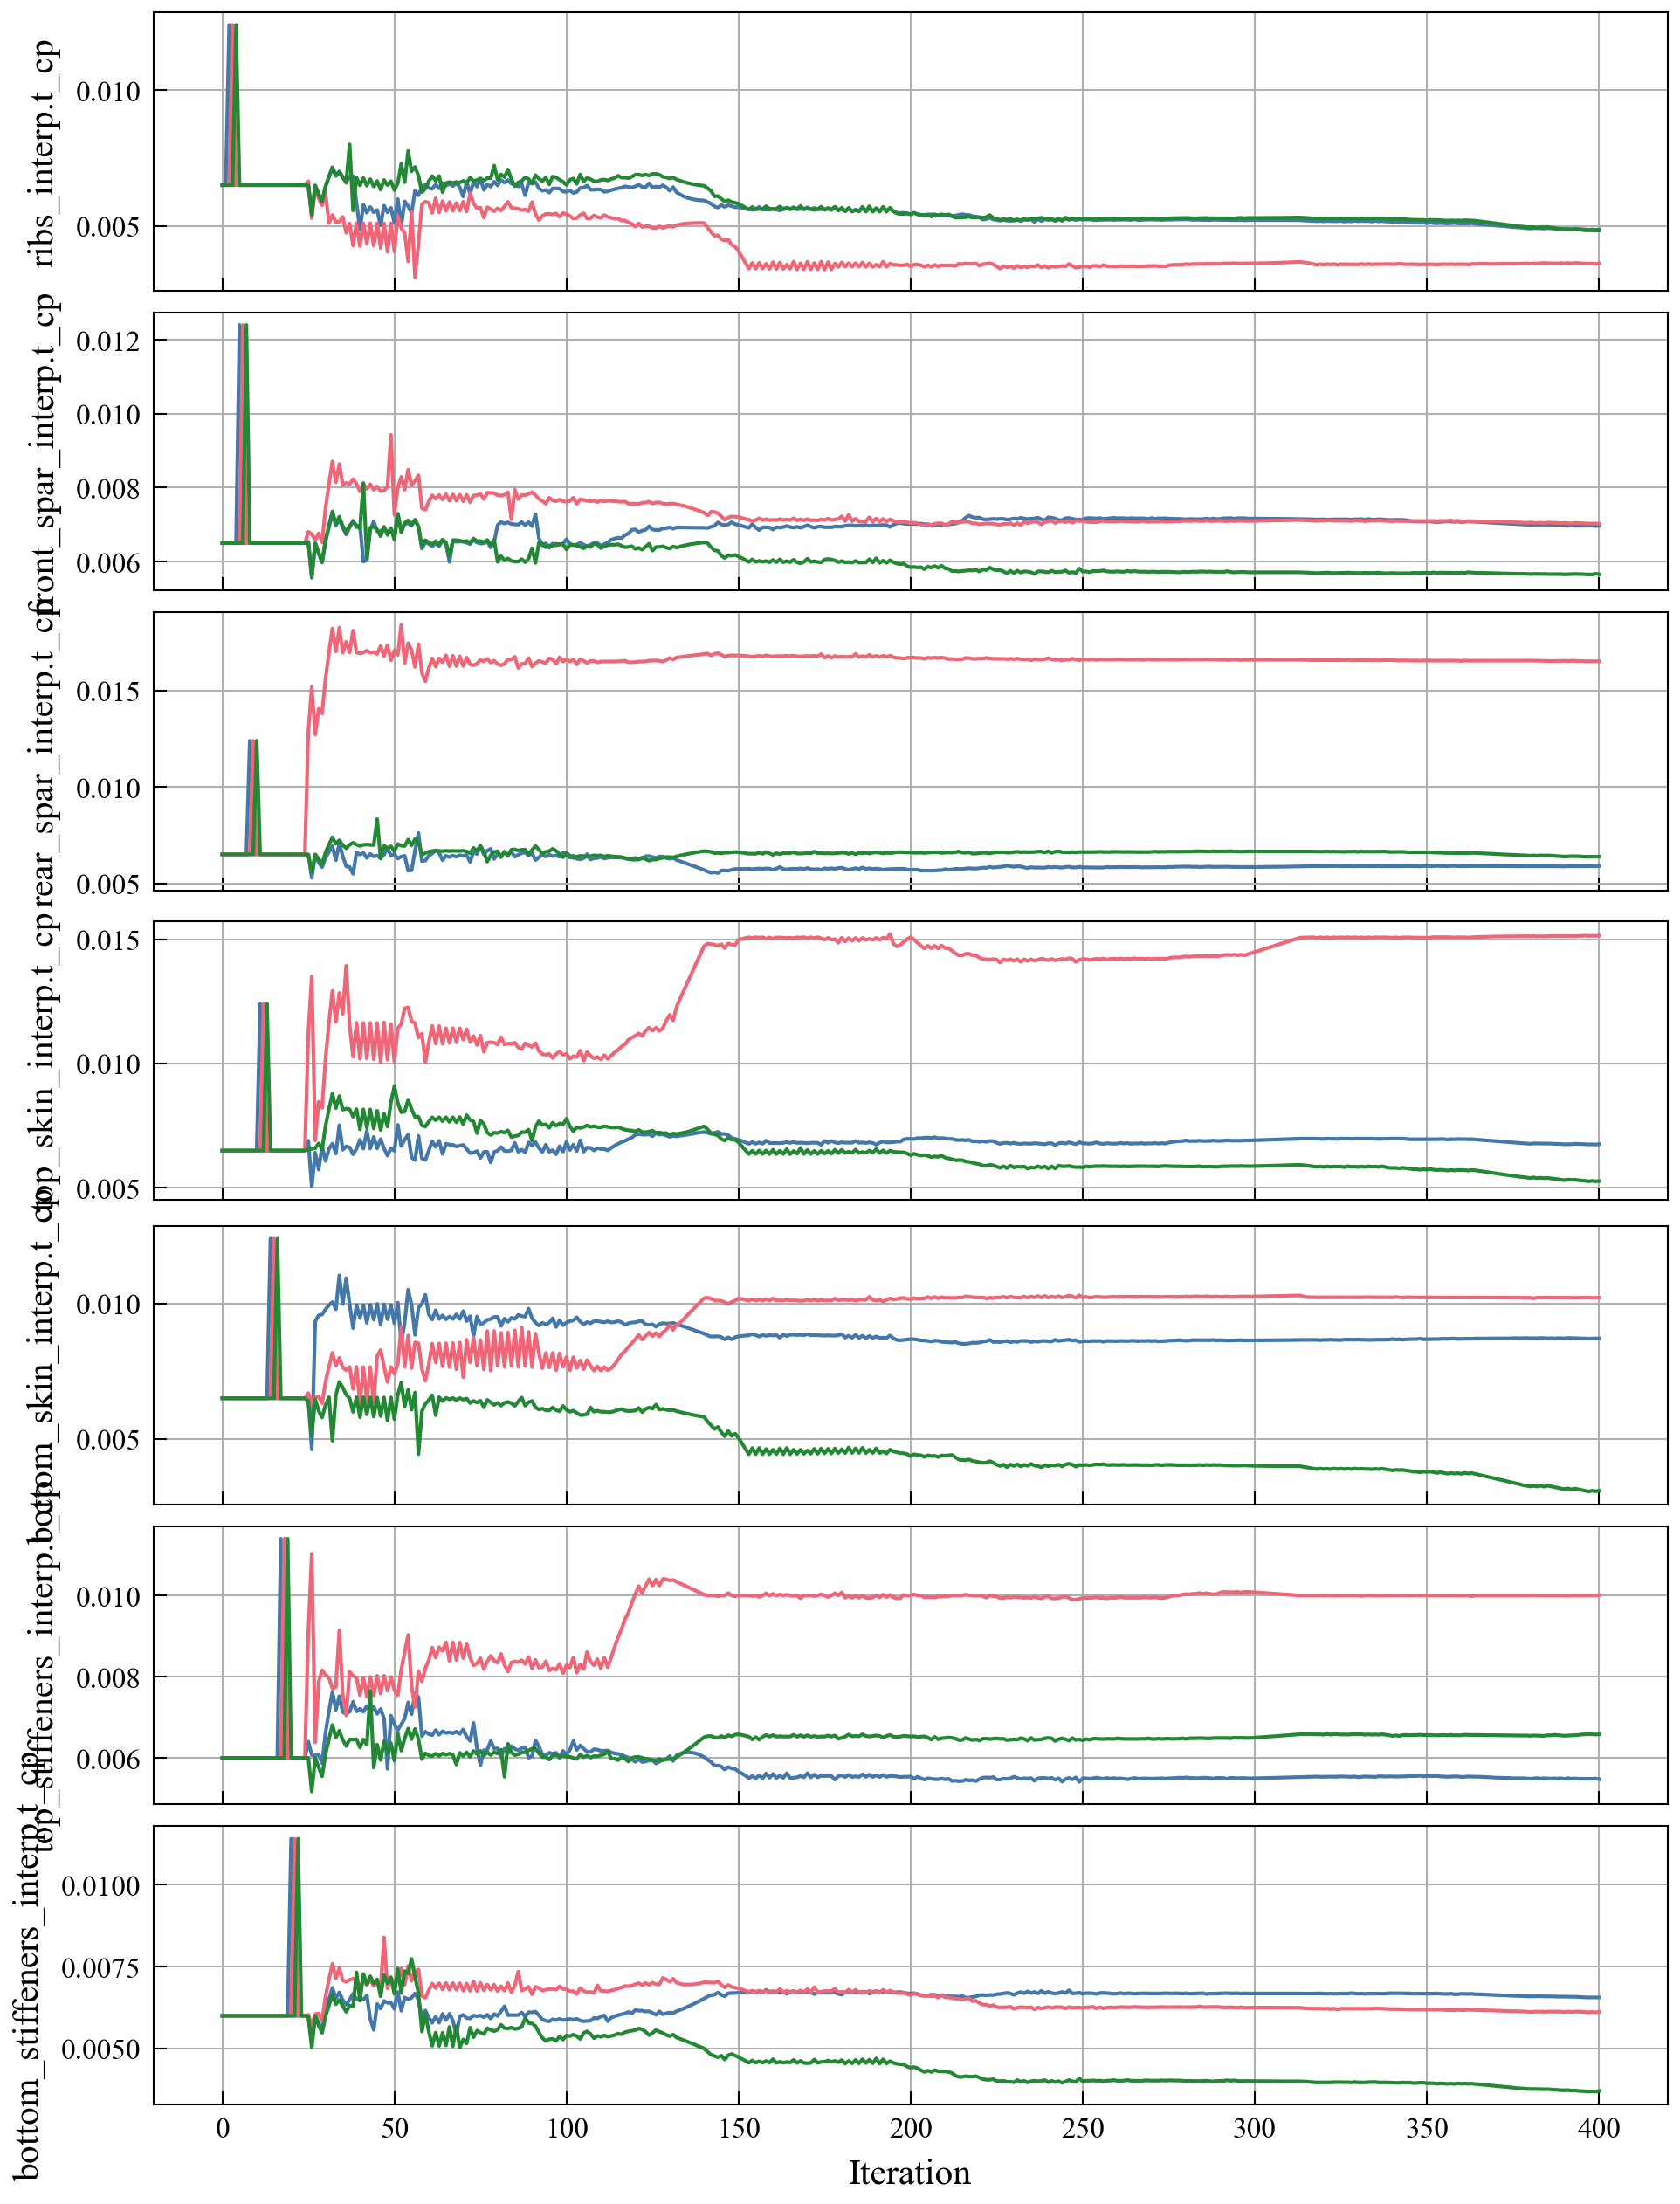

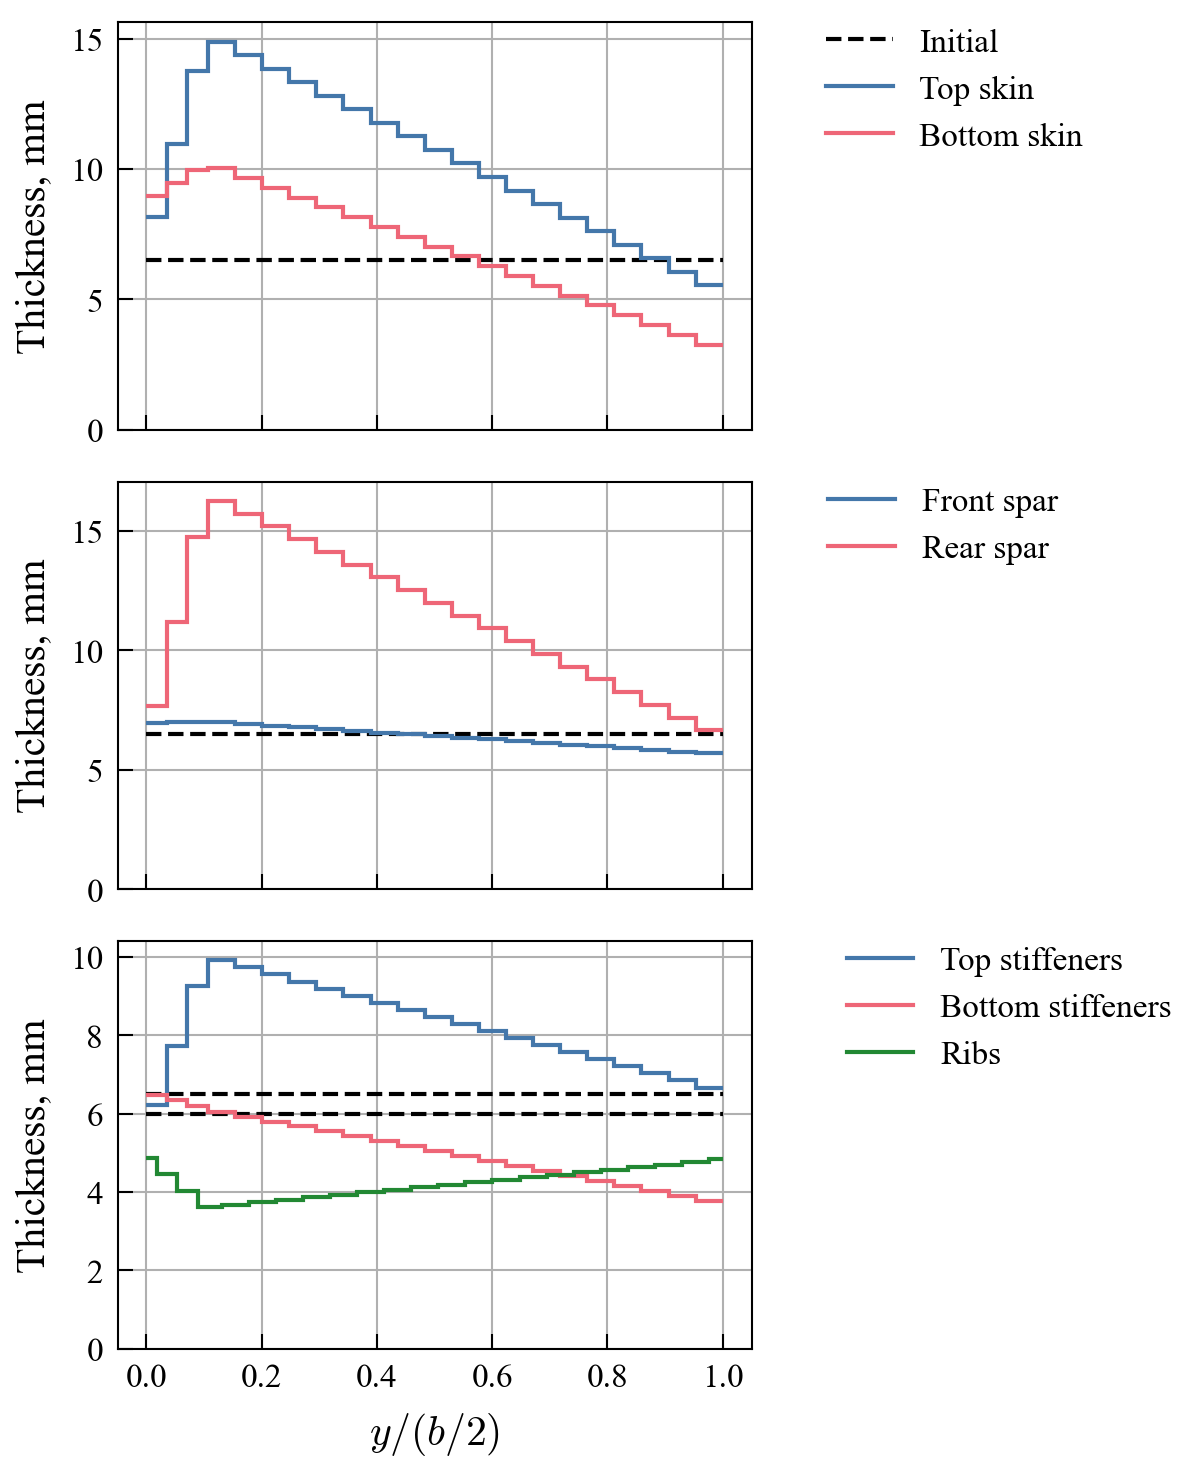

In [52]:
# Retrieve y-coordinates of the control points
y_cp_vector = wingGeometry.LESparCoords[:, 1]

# Find ribs' and panels' y-coordinates
ribs_y_coords = layout.X[:, 0, 1]
panels_y_coords = ribs_y_coords[:-1] + np.diff(ribs_y_coords)/2

# Find design variables at last iteration
design_variables = [
    "ribs_interp.t_cp",
    "front_spar_interp.t_cp",
    "rear_spar_interp.t_cp",
    "top_skin_interp.t_cp",
    "bottom_skin_interp.t_cp",
    "top_stiffeners_interp.t_cp",
    "bottom_stiffeners_interp.t_cp"]
_, _, design_variable_histories = plot_optimization_history(
    recorder_filepath=recorder_filepath,
    variable_names=design_variables)
plt.show()

# Create nondimensional y-coordinates
nondimensional_initial_y_coords = np.array([
    y_cp_vector[0], y_cp_vector[-1]])/wingGeometry.semiSpan
nondimensional_panels_y_coords = ribs_y_coords/wingGeometry.semiSpan
nondimensional_ribs_y_coords = np.hstack((
    y_cp_vector[0], panels_y_coords, y_cp_vector[-1]))/wingGeometry.semiSpan

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(FIG_WIDTH_INCHES, FIG_HEIGHT_INCHES*2))

# Find skin thikness distribution by interpolation
top_skin_thickness = np.interp(
    panels_y_coords,
    y_cp_vector,
    design_variable_histories["top_skin_interp.t_cp"][-1])
bottom_skin_thickness = np.interp(
    panels_y_coords,
    y_cp_vector,
    design_variable_histories["bottom_skin_interp.t_cp"][-1])

# Plot skin thickness distribution in first subplot
axes[0].stairs(
    np.array([wingGeometry.panelThickness*1e3]),
    nondimensional_initial_y_coords,
    baseline=None, label="Initial", zorder=2, color='k', linestyle='--')  # initial skin thickness
axes[0].stairs(
    top_skin_thickness*1e3,
    nondimensional_panels_y_coords,
    baseline=None, label="Top skin", zorder=2)
axes[0].stairs(
    bottom_skin_thickness*1e3,
    nondimensional_panels_y_coords,
    baseline=None, label="Bottom skin", zorder=2)
axes[0].set_ylabel("Thickness, mm")
axes[0].grid(True)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.57, 1.06))

# Find spar thickness distribution by interpolation
front_spar_thickness = np.interp(
    panels_y_coords,
    y_cp_vector,
    design_variable_histories["front_spar_interp.t_cp"][-1])
rear_spar_thickness = np.interp(
    panels_y_coords,
    y_cp_vector,
    design_variable_histories["rear_spar_interp.t_cp"][-1])

# Plot spar thickness distribution in second subplot
axes[1].stairs(
    np.array([wingGeometry.panelThickness*1e3]),
    nondimensional_initial_y_coords,
    baseline=None, zorder=2, color='k', linestyle='--')  # initial spar thickness
axes[1].stairs(
    front_spar_thickness*1e3,
    nondimensional_panels_y_coords,
    baseline=None, label="Front spar", zorder=2)
axes[1].stairs(
    rear_spar_thickness*1e3,
    nondimensional_panels_y_coords,
    baseline=None, label="Rear spar", zorder=2)
axes[1].set_ylabel("Thickness, mm")
axes[1].grid(True)
axes[1].legend(loc='upper right', bbox_to_anchor=(1.53, 1.06))

# Find stiffeners and ribs thickness distribution by interpolation
top_stiffeners_thickness = np.interp(
    panels_y_coords,
    y_cp_vector,
    design_variable_histories["top_stiffeners_interp.t_cp"][-1])
bottom_stiffeners_thickness = np.interp(
    panels_y_coords,
    y_cp_vector,
    design_variable_histories["bottom_stiffeners_interp.t_cp"][-1])
rib_thickness = np.interp(
    ribs_y_coords,
    y_cp_vector,
    design_variable_histories["ribs_interp.t_cp"][-1])

# Plot stiffeners and ribs thickness distribution in third subplot
axes[2].stairs(
    np.array([wingGeometry.panelThickness*1e3]),
    nondimensional_initial_y_coords,
    baseline=None, zorder=2, color='k', linestyle='--')  # initial rib thickness
axes[2].stairs(
    np.array([wingGeometry.stiffenerThickness*1e3]),
    nondimensional_initial_y_coords,
    baseline=None, zorder=2, color='k', linestyle='--')  # initial stiffener thickness
axes[2].stairs(
    top_stiffeners_thickness*1e3,
    nondimensional_panels_y_coords,
    baseline=None, label="Top stiffeners", zorder=2)
axes[2].stairs(
    bottom_stiffeners_thickness*1e3,
    nondimensional_panels_y_coords,
    baseline=None, label="Bottom stiffeners", zorder=2)
axes[2].stairs(
    rib_thickness*1e3,
    nondimensional_ribs_y_coords,
    baseline=None, label="Ribs", zorder=2)
axes[2].set_ylabel("Thickness, mm")
axes[2].grid(True)
axes[2].legend(loc='upper right', bbox_to_anchor=(1.71, 1.06))
axes[2].set_xlabel(r"$y/\left(b/2\right)$")

# Show and save plot
plt.show()
fig.savefig(os.path.join(
    FIGURES_DIRECTORY_PATH, "LinearlyOptimizedThicknessDistribution.pdf"))

Print quantities of interest for the linearly optimized design.

In [48]:
from resources.STW.performanceCalc import elhamRegression,\
    computeLandingGrossMass

wingbox_mass = objective_constraints_histories["pull_up_sol_105.mass"][-1, 0]
wing_mass = elhamRegression(wingboxMass=wingbox_mass)
landing_gross_mass = computeLandingGrossMass(
    wingMass=wing_mass, payloadMass=PAYLOAD_MASS, airframeMass=AIRFRAME_MASS,
    reserveFuelMass=RESERVE_FUEL_MASS)
alpha_2p5g = maneuver_aoa_histories["maneuver_aoa"][-1, 0]
alpha_minus1g = maneuver_aoa_histories["maneuver_aoa"][-1, 1]
print(f"""
Quantities of interest for the linearly optimized design:
- Wingbox mass: {wingbox_mass:.0f} kg
- Wing mass: {wing_mass:.0f} kg
- Landing gross mass: {landing_gross_mass:.0f} kg
- 2.5 g maneuver angle of attack: {alpha_2p5g:.1f} deg
- -1 g maneuver angle of attack: {alpha_minus1g:.1f} deg""")


Quantities of interest for the linearly optimized design:
- Wingbox mass: 1813 kg
- Wing mass: 4634 kg
- Landing gross mass: 50768 kg
- 2.5 g maneuver angle of attack: 8.6 deg
- -1 g maneuver angle of attack: -6.4 deg


Plot eigenvalue diagram for the linearly optimized design.

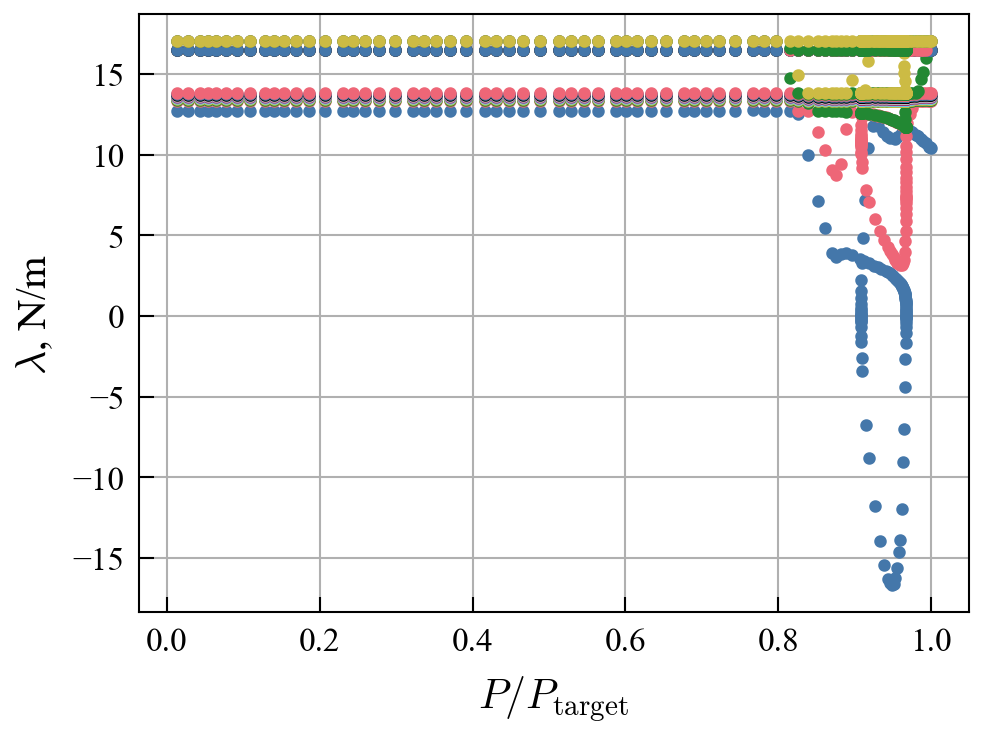

In [53]:
# Read op2 file
op2_filepath = os.path.join(
    ANALYSIS_DIRECTORY_PATH, "sol_106_pull_up_start.op2")
sol_106_op2 = read_op2(op2_filepath, load_geometry=True, debug=None)

# Read loads and eigenvalues
load_factors, _, _ =\
pynastran_utils.read_load_displacement_history_from_op2(op2=sol_106_op2)
subcase_key = next(iter(load_factors.keys()))
nondimensional_loads = load_factors[subcase_key]
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_op2(
    op2=sol_106_op2)

# Plot the eigenvalue diagram for both models
fig, ax = plot_utils.plot_eigenvalue_diagram(
    loads=nondimensional_loads,
    eigenvalues=eigenvalues)

# Set axis labels and grid
ax.set_xlabel("$P/P_\mathrm{target}$")
ax.set_ylabel(f"$\lambda$, N/m")
ax.grid(visible=True)

# Show and save plot
plt.show()
fig.savefig(os.path.join(
    FIGURES_DIRECTORY_PATH, "LinearOptEigenvalueDiagram.pdf"))

Print nonlinear critical load.

In [54]:
first_negative_eigenvalue_index = np.where(eigenvalues[0] < 0)[0][0]
nonlinear_critical_load = nondimensional_loads[first_negative_eigenvalue_index]
print(f"Nonlinear critical load factor: {nonlinear_critical_load:.2f}")

Nonlinear critical load factor: 0.97


Plot critical eigenvector of tangent stiffness matrix of linealry optimized design.

/mnt/c/Users/qa21944/Github/phd-jupyter-notebooks/notebooks/resources/plot_utils.py:622: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)


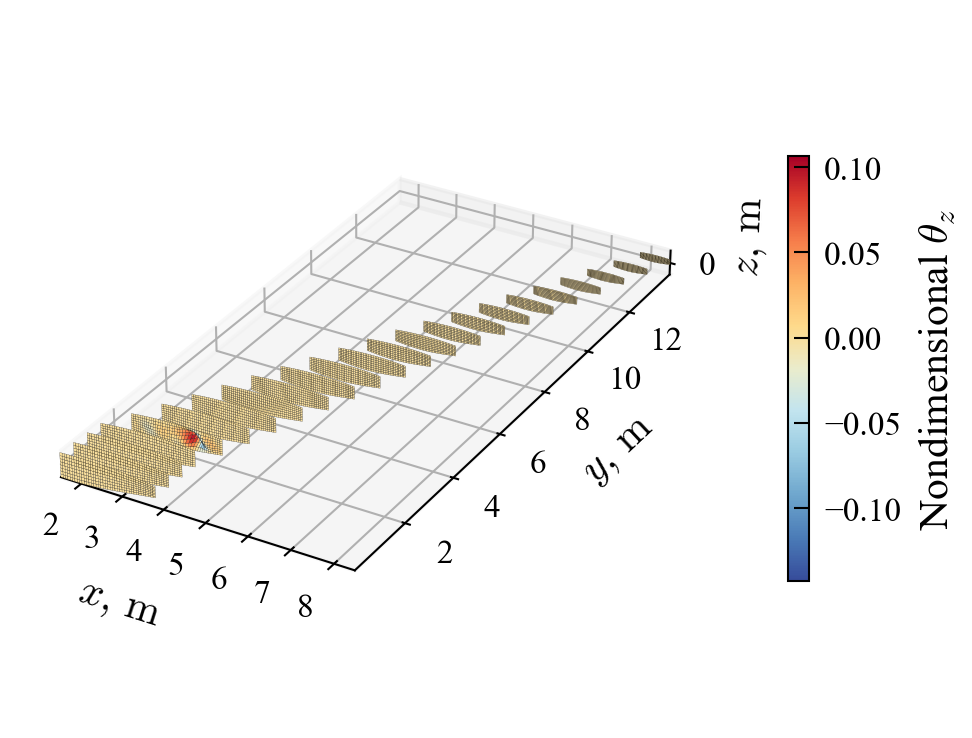

/home/fmamitrotta/anaconda3/envs/aeroelastic-opt-benchmark/lib/python3.10/site-packages/ipympl/backend_nbagg.py:279: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  self.manager.handle_json(content)


In [ ]:
def find_element_ids(layout, part_names):
    # Find number of structural segments
    num_segments = len(layout.elemTopo.lIndex)
    
    # Initialize list of element ids for each segment and element counter
    elem_ids = [None] * num_segments
    elem = 1
    
    # Loop over all segments and find the element ids
    for i in range(num_segments):
        local = layout.elemTopo.lIndex[i]  # array with local node indices
        num_rows = local.shape[0] - 1  # number of element rows
        num_cols = local.shape[1] - 1  # number of element columns
        elem_ids[i] = np.arange(elem, elem + num_rows * num_cols)
        elem += num_rows * num_cols  # increment element counter
    
    # Find the element ids of the specified parts
    part_element_ids = {name: None for name in part_names}
    descriptions = np.array(layout.faceDescript)
    for i, name in enumerate(part_names):
        mask = np.char.find(descriptions, name) >= 0
        part_element_ids[name] = np.concatenate(list(compress(elem_ids, mask)))
    
    # Return the element ids of the specified parts
    return part_element_ids

# Find the key of the eigenvectors dictionary
eigenvectors_key = next(iter(sol_106_op2.eigenvectors))

# Find the element ids of the ribs
element_ids_dict = find_element_ids(layout, ['RIB'])
ribs_elements_ids = element_ids_dict['RIB']

# Find the critical eigenvector number
critical_eigenvector_number =\
    NO_EIGENVALUES*first_negative_eigenvalue_index + 1

# Plot the critical eigenvector
amplification_factor = 10
fig, ax, cbar = plot_utils.plot_eigenvector(
        op2=sol_106_op2, subcase_id=eigenvectors_key,
        elements_ids=ribs_elements_ids,
        eigenvector_number=critical_eigenvector_number,
        displacement_component='rz', colormap='sunset',
        displacement_amplification_factor=amplification_factor,
        shrink_colorbar=.6, colorbar_pad=.09)

# # Plot node where max displacement occurs
# max_disp_node_id = plot_utils.plot_max_displacement_node(
#     axes=ax, op2=sol_106_op2, subcase_id=eigenvectors_key,
#     eigenvector_number=critical_eigenvector_number,
#     displacement_amplification_factor=amplification_factor)
# ax.legend()

# Adjust plot appearance, show and save plot
ax.set_zticks([0.])
adjust_3d_plot(ax)
plt.show()
fig.savefig(os.path.join(
    FIGURES_DIRECTORY_PATH, "LinearOptCriticalEigenvector.pdf"))

Plot load-displacement diagram for the linearly optimized design.

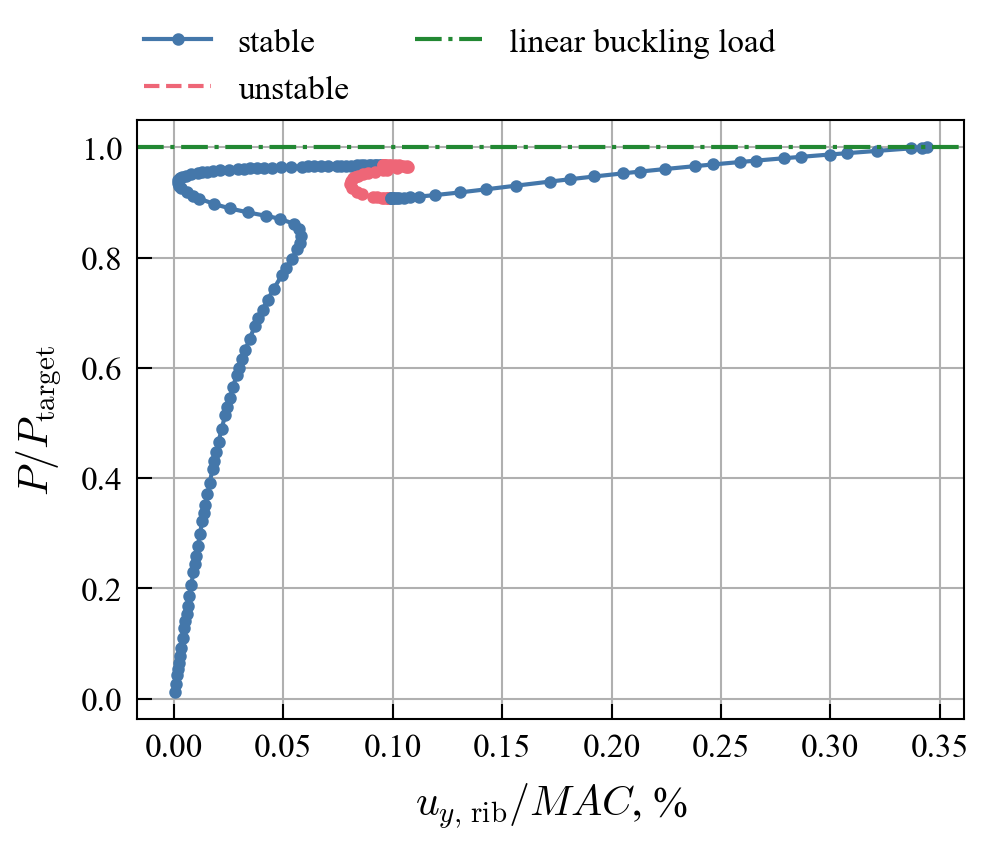

In [74]:
# Read the displacement history
# max_disp_node_id = plot_utils.plot_max_displacement_node(
#     axes=ax, op2=sol_106_op2, subcase_id=eigenvectors_key,
#     eigenvector_number=critical_eigenvector_number,
#     displacement_amplification_factor=amplification_factor)
_, _, displacements =\
    pynastran_utils.read_load_displacement_history_from_op2(
        op2=sol_106_op2, node_ids=[max_disp_node_id])

# Calculate nondimensional SOB displacements
displacements_key = next(iter(displacements[max_disp_node_id]))
nondimensional_rib_displacements = displacements[
    max_disp_node_id][displacements_key][:, Y_COMPONENT_INDEX]/\
        wingGeometry.meanAerodynamicChord
        
# Create figure for load-displacement diagram
fig, ax = plt.subplots()  # create a figure with two subplots

# Plot the load-displacement diagram
plot_utils.plot_2d_load_displacements_stability(
    axes=ax,
    displacements=nondimensional_rib_displacements*100,
    loads=nondimensional_loads,
    eigenvalues=eigenvalues,
    marker=MARKERS[0], color=COLORS[0])
    
# Plot glass-ceiling line
ax.axhline(y=1., color=GLASS_CEILING_COLOR, linestyle='-.')

# Set grid and axes labels
ax.grid(visible=True)
ax.set_xlabel(
    "$u_{y,\,\mathrm{rib}}/MAC$, %")
ax.set_ylabel("$P/P_\mathrm{target}$")

# Add proxy artist for unstable lines and create legend
fig.legend(
    handles=[stable_line, unstable_line, linear_buckling_line],
    ncol=2, bbox_to_anchor=(.82, 1.15))

# Show and save plot
plt.show()
fig.savefig(os.path.join(
        FIGURES_DIRECTORY_PATH,
        "LinearOptLoadDisplacementDiagram.pdf"))